### MEHMET EREN SOYKOK - 2200765016
### Kazım Halil KESMUK - 2200765031

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing and Cleaning

In [2]:
url="https://drive.google.com/file/d/1J5ALcFn-UdHW_niroJ7jetKCXyfJXJs-/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

dataframe = pd.read_csv(url)
dataframe.isnull().sum()
# There is no null data in the dataframe.

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [3]:
dataframe.drop("ID", axis=1, inplace=True)

In [4]:
dataframe.dtypes

gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
smoking                  int64
dtype: object

In [5]:
print("Unique valuesfor gender: ", dataframe["gender"].unique())
print("Unique valuesfor oral: ", dataframe["oral"].unique())
print("Unique valuesfor tartar: ", dataframe["tartar"].unique())

Unique valuesfor gender:  ['F' 'M']
Unique valuesfor oral:  ['Y']
Unique valuesfor tartar:  ['Y' 'N']


### gender, oral and tartar values need to set as a binary values.

In [6]:
dataframe["gender"].replace({"F":0, "M":1}, inplace=True)
dataframe["oral"].replace({"N":0, "Y":1}, inplace=True)
dataframe["tartar"].replace({"N":0, "Y":1}, inplace=True)


In [7]:
print("Unique valuesfor gender: ", dataframe["gender"].unique())
print("Unique valuesfor oral: ", dataframe["oral"].unique())
print("Unique valuesfor tartar: ", dataframe["tartar"].unique())

Unique valuesfor gender:  [0 1]
Unique valuesfor oral:  [1]
Unique valuesfor tartar:  [1 0]


In [8]:
def linePlotCreater(df, col1, col2, col3, col4, y):
   
    val1 = df[col1]
    val2 = df[col2]
    val3 = df[col3]
    val4 = df[col4]
    val_y = df[y]
    
    fig, axs = plt.subplots(4, figsize=(12,30))

    axs[0].plot(val_y, val1 )
    axs[0].set_xlabel(y)
    axs[0].set_ylabel(col1)

    axs[1].plot(val_y, val2 )
    axs[1].set_xlabel(y)
    axs[1].set_ylabel(col2)
    
    axs[2].plot(val_y, val3 )
    axs[2].set_xlabel(y)
    axs[2].set_ylabel(col3)

    axs[3].plot(val_y, val4 )
    axs[3].set_xlabel(y)
    axs[3].set_ylabel(col4)



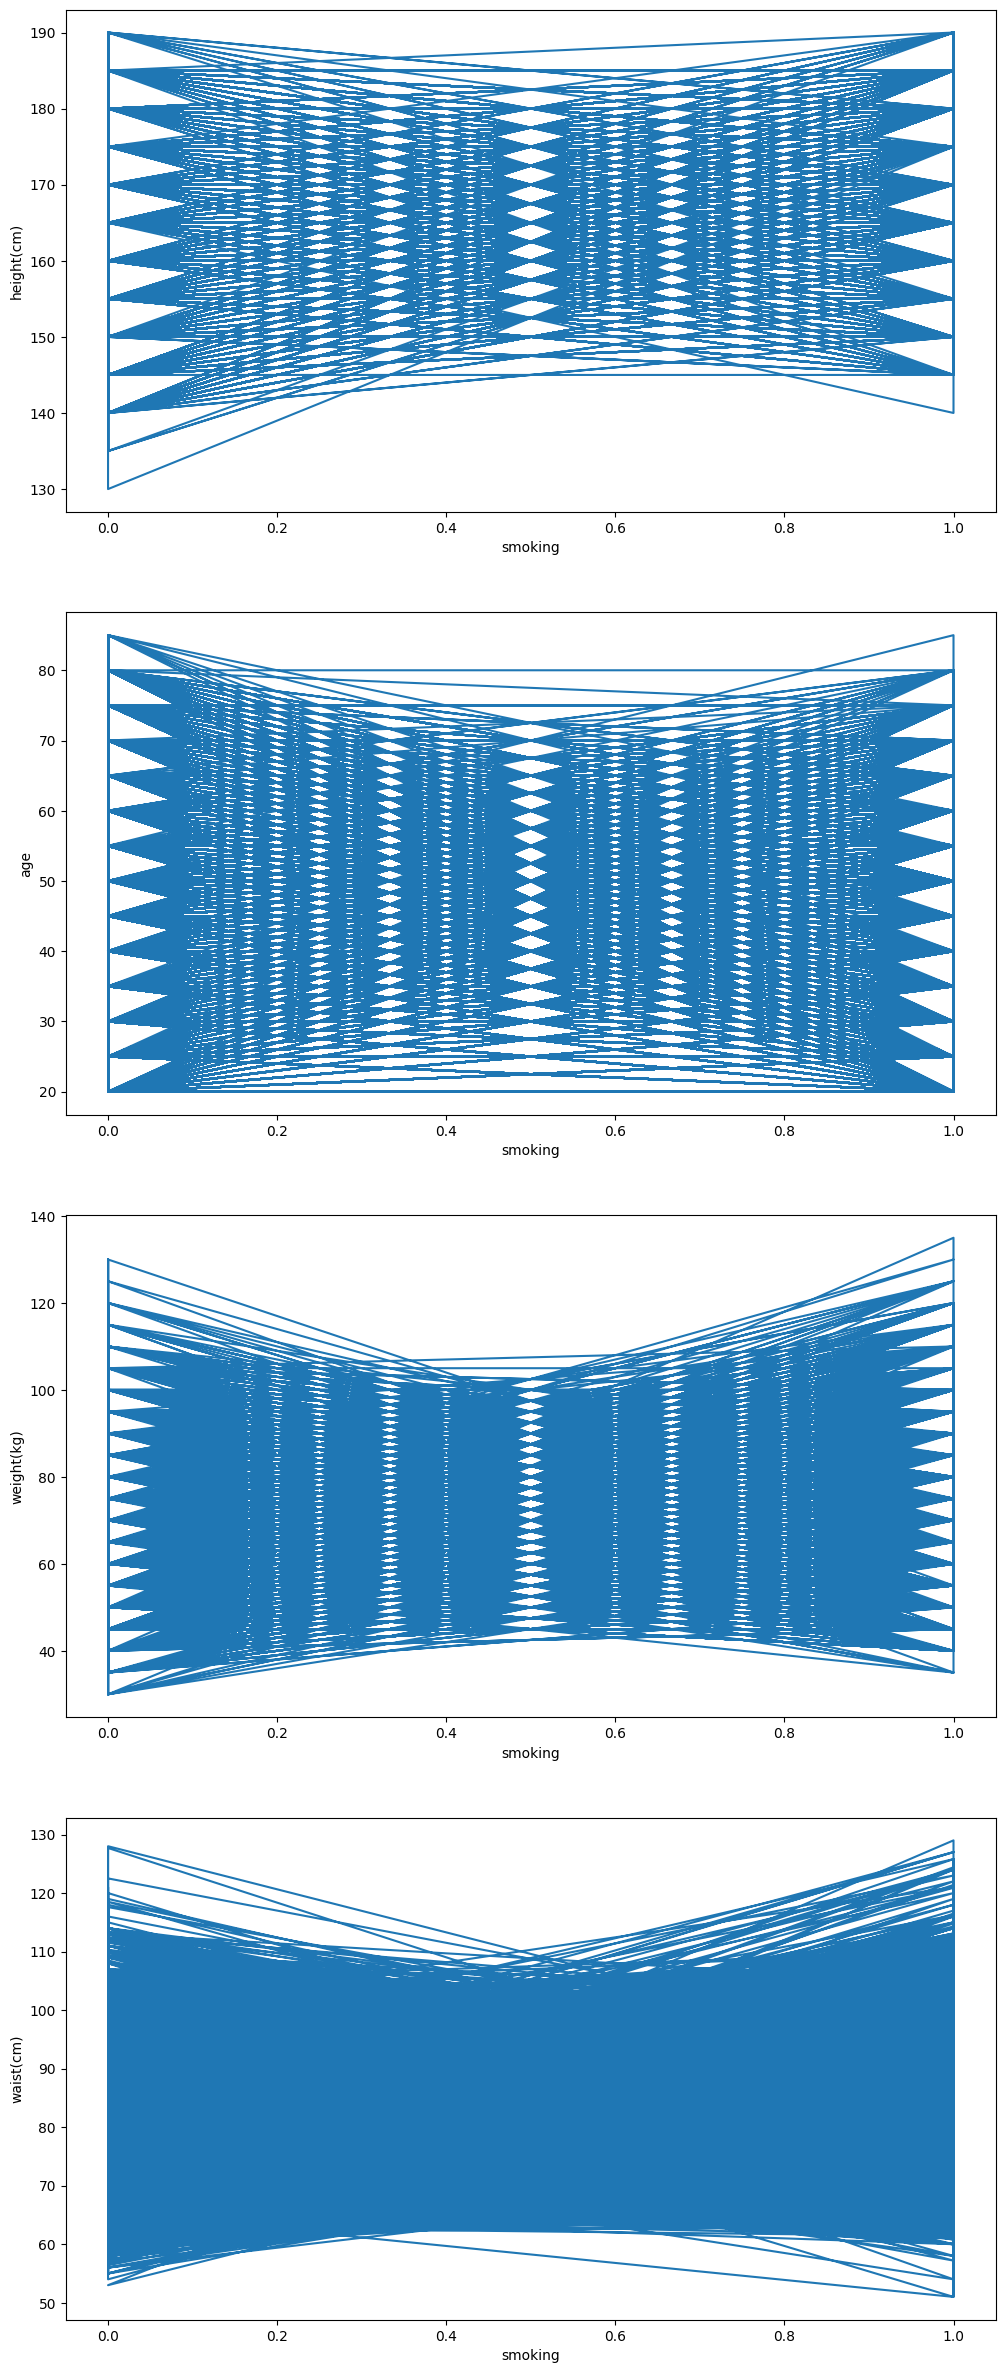

In [9]:
linePlotCreater(dataframe, "height(cm)", "age", "weight(kg)", "waist(cm)", "smoking")

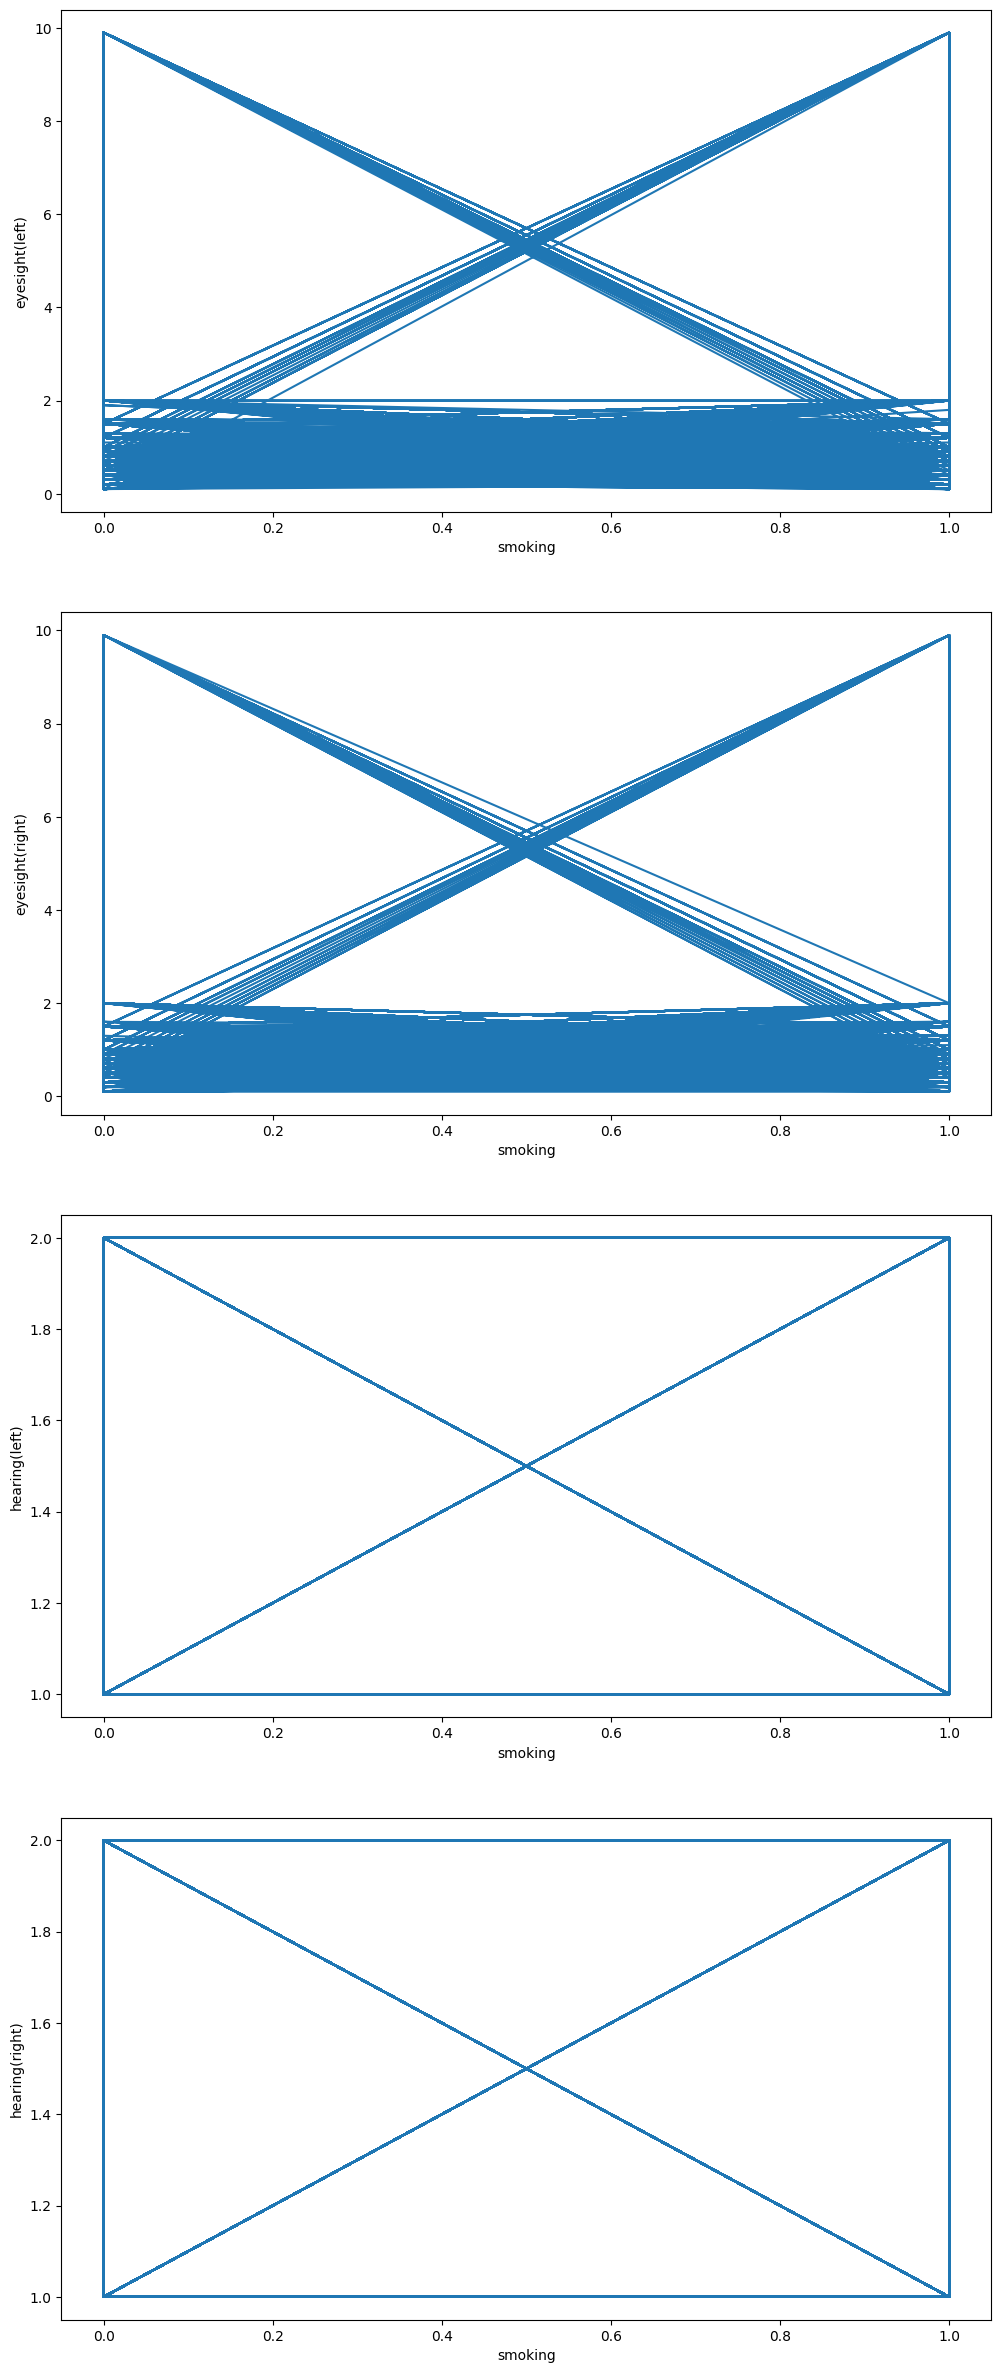

In [10]:
linePlotCreater(dataframe, "eyesight(left)", "eyesight(right)", "hearing(left)", "hearing(right)", "smoking")


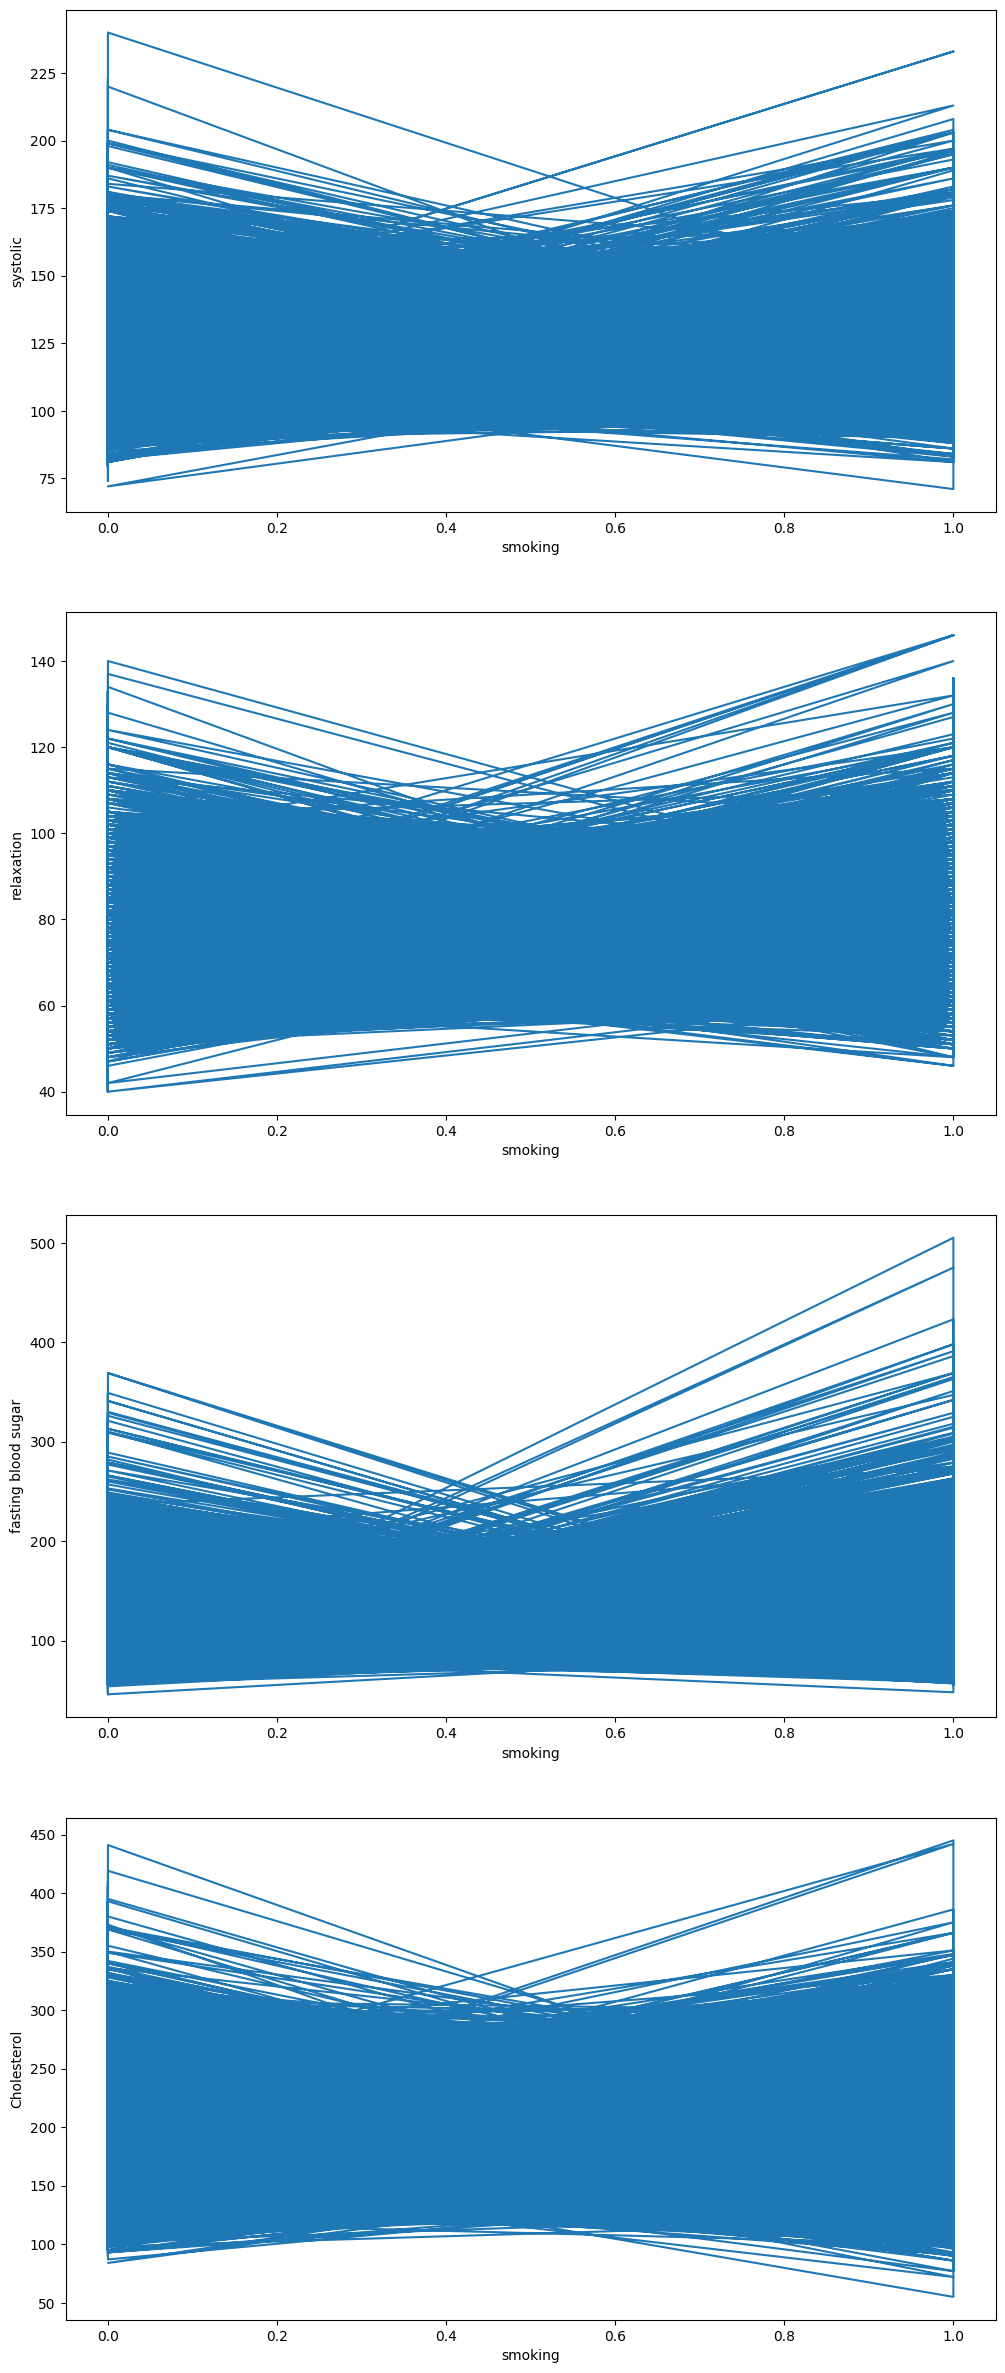

In [11]:
linePlotCreater(dataframe, "systolic", "relaxation", "fasting blood sugar", "Cholesterol", "smoking")


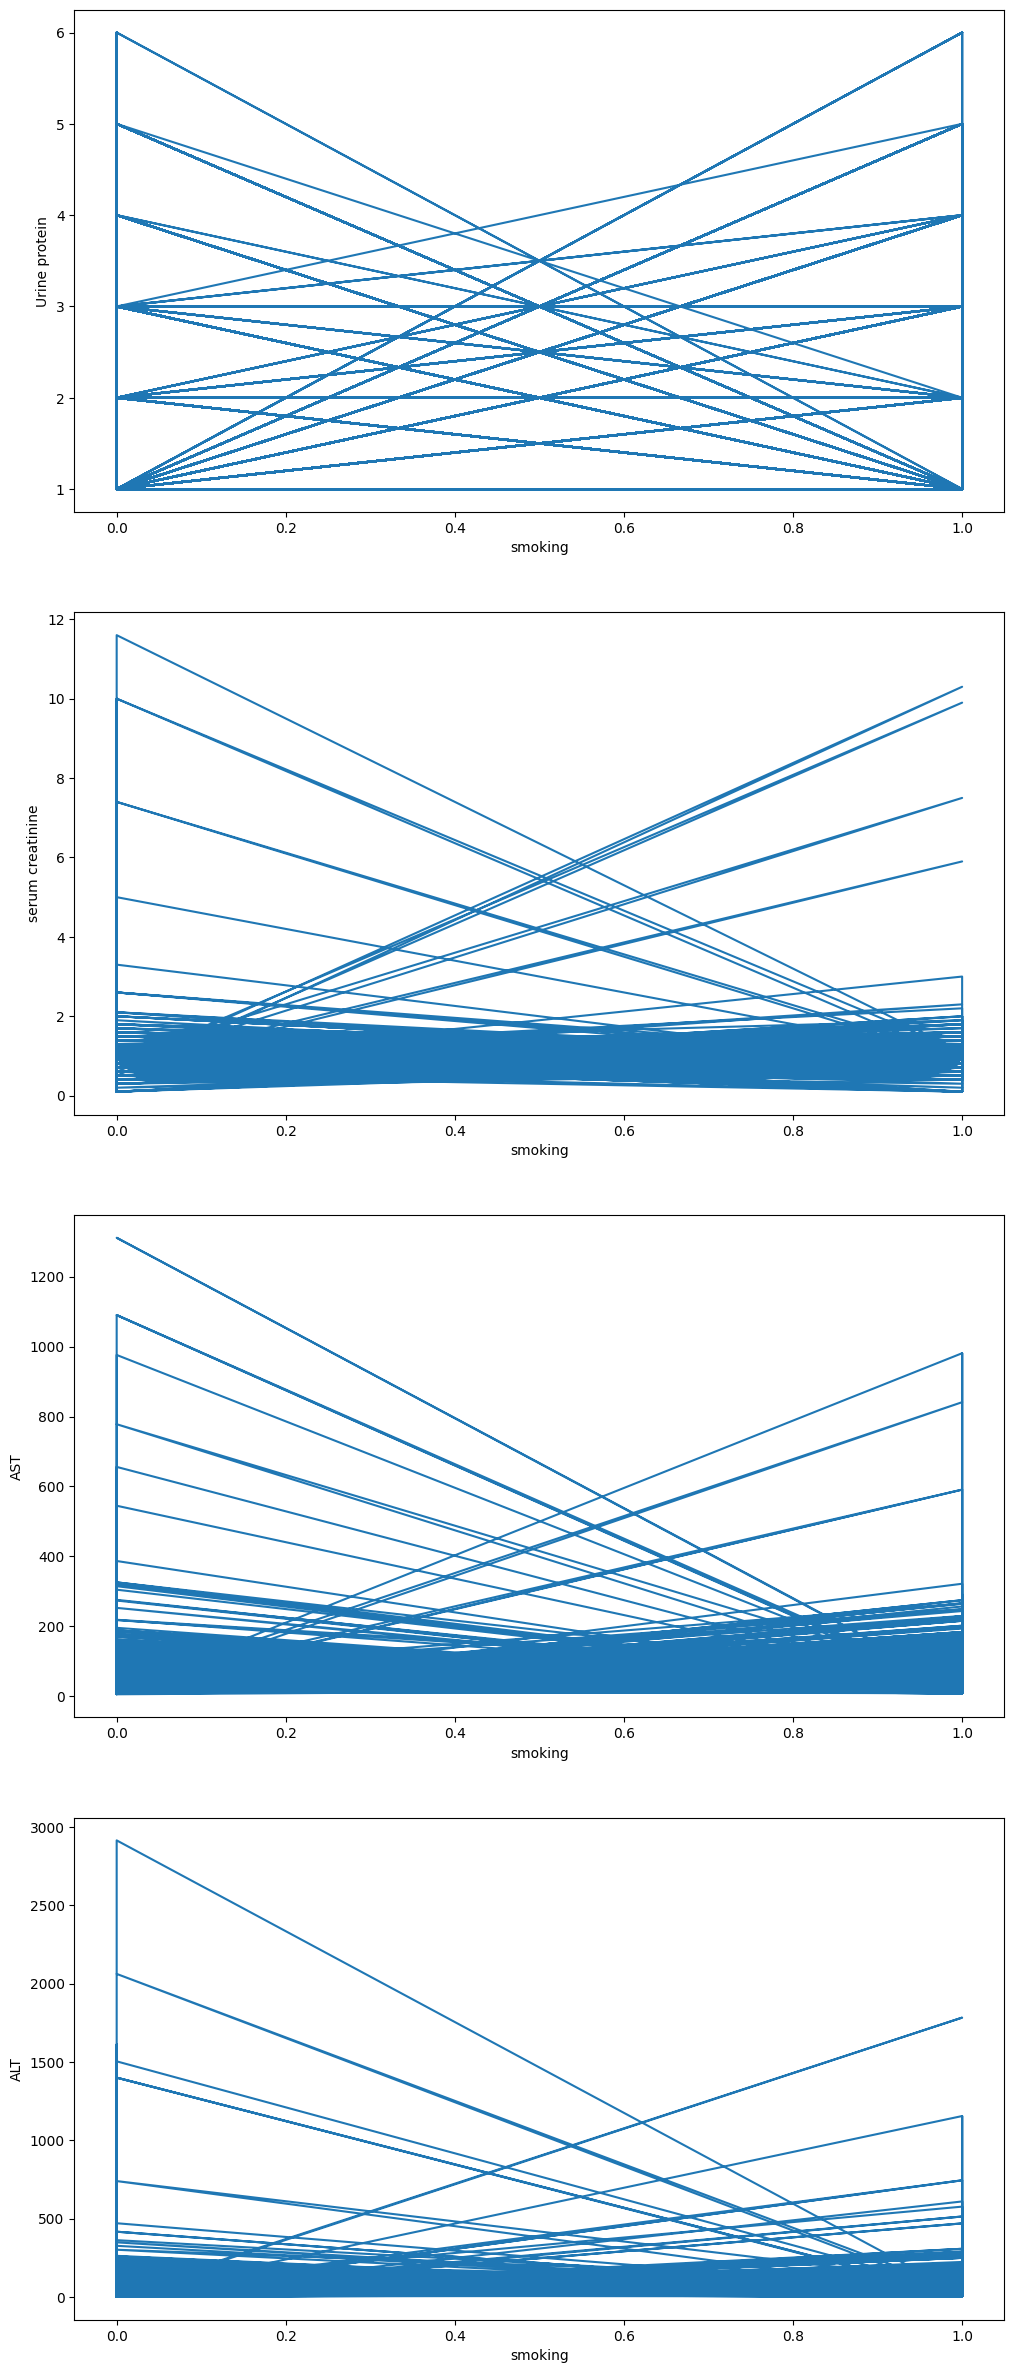

In [12]:
linePlotCreater(dataframe, "Urine protein", "serum creatinine", "AST", "ALT", "smoking")


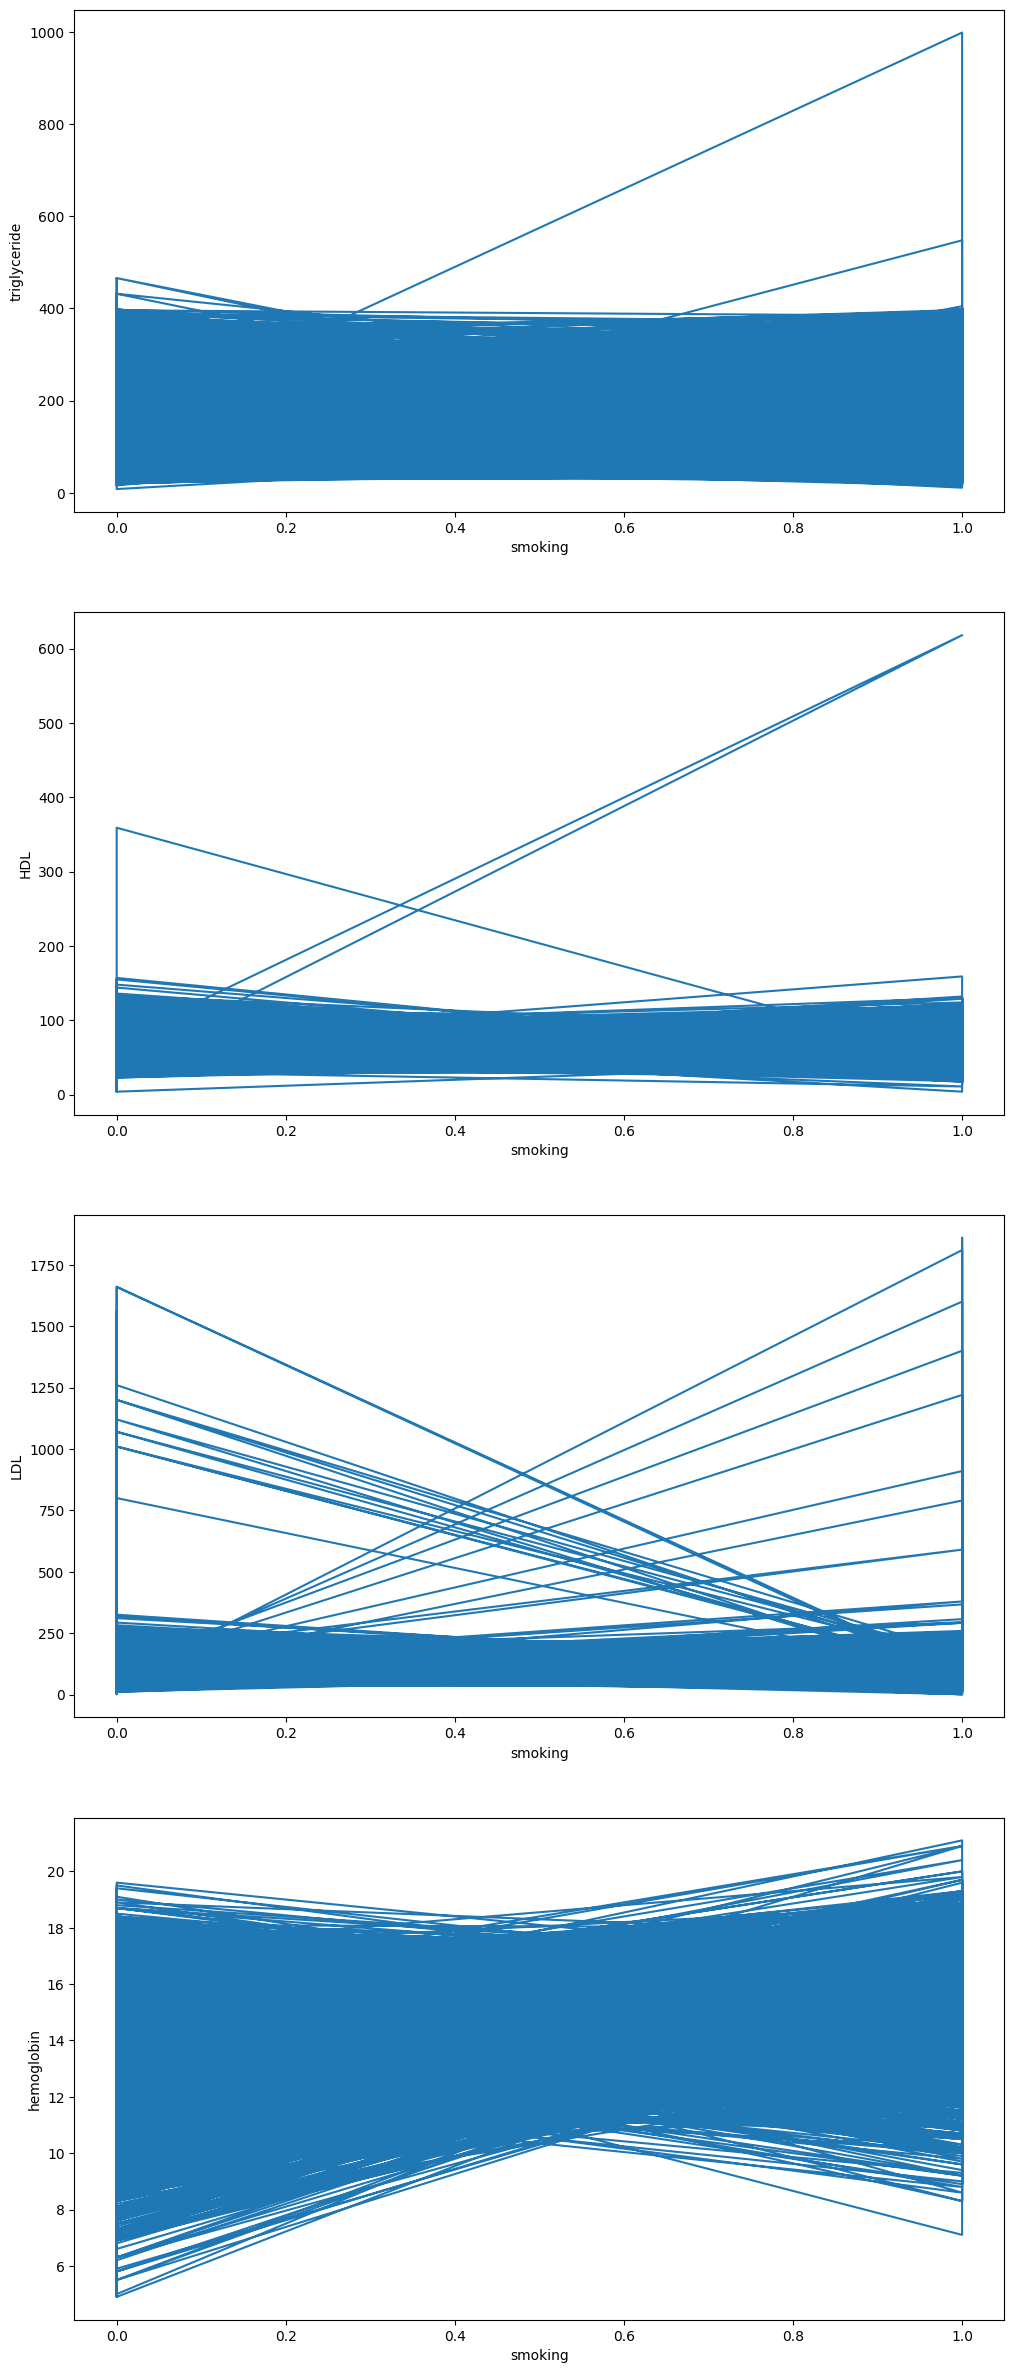

In [13]:
linePlotCreater(dataframe, "triglyceride", "HDL", "LDL", "hemoglobin", "smoking")

## Remove Outliers
### There are some outliers on "systolic", "relaxation", "fasting blood sugar", "Cholesterol", "serum creatinine", "AST", "ALT","triglyceride", "HDL", "LDL", "hemoglobin", "smoking". They should be removed.

In [14]:
dataframe.shape

(55692, 26)

In [15]:
def detect_remove_outliers(df, cols):
    
    Q1 = df[cols].quantile(0.15)
    Q3 = df[cols].quantile(0.85)
    IQR = Q3 - Q1
    
    df = df[~( (df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR)) ).any(axis=1)]
    
    return df

col_list = ["systolic", "relaxation", "fasting blood sugar", "Cholesterol",
            "serum creatinine", "AST", "ALT", "triglyceride",
            "HDL", "LDL", "hemoglobin"]

removed_df = detect_remove_outliers(dataframe, col_list)
removed_df.reset_index(drop=True, inplace=True)


In [16]:
removed_df.shape

(51809, 26)

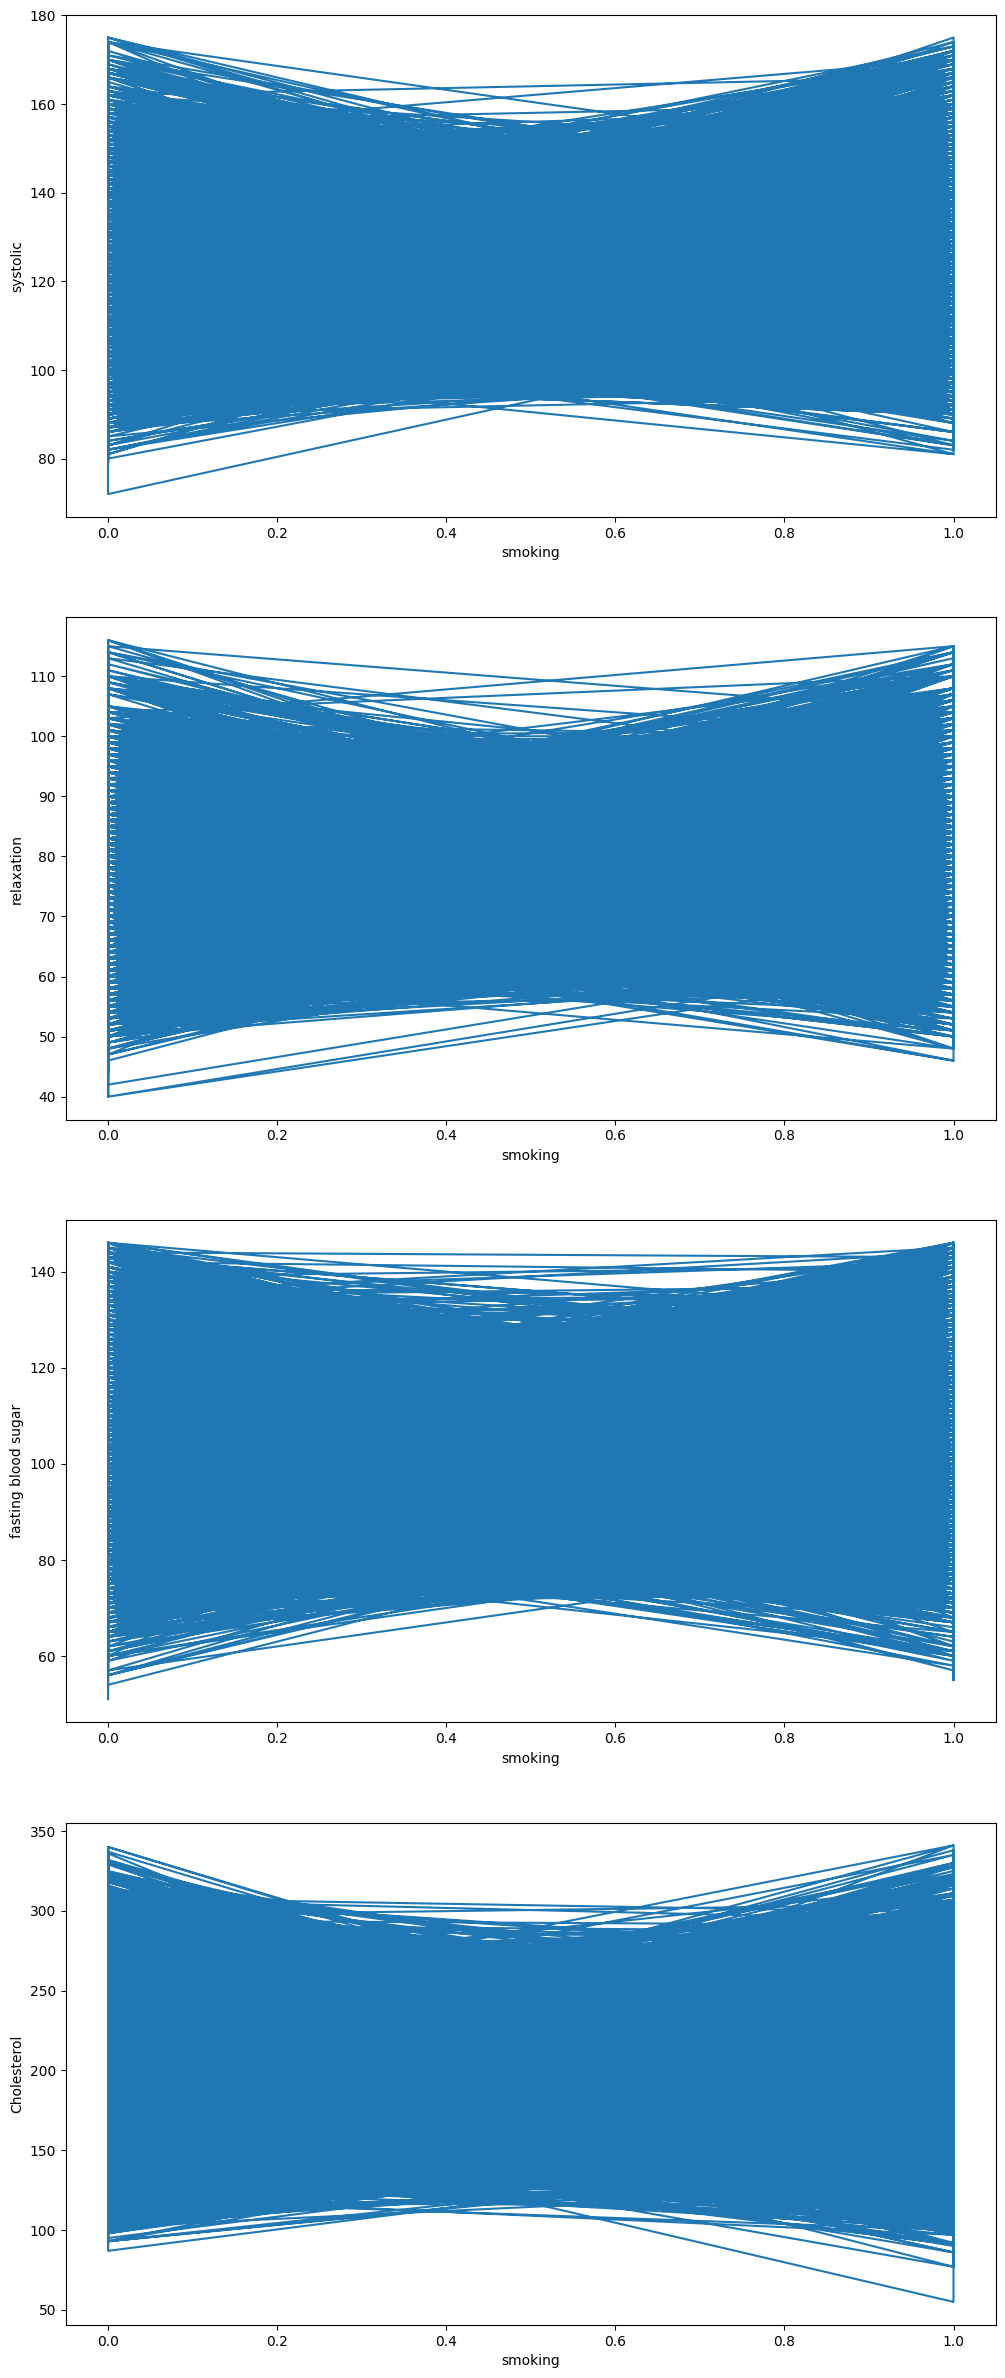

In [17]:
linePlotCreater(removed_df, "systolic", "relaxation", "fasting blood sugar", "Cholesterol", "smoking")


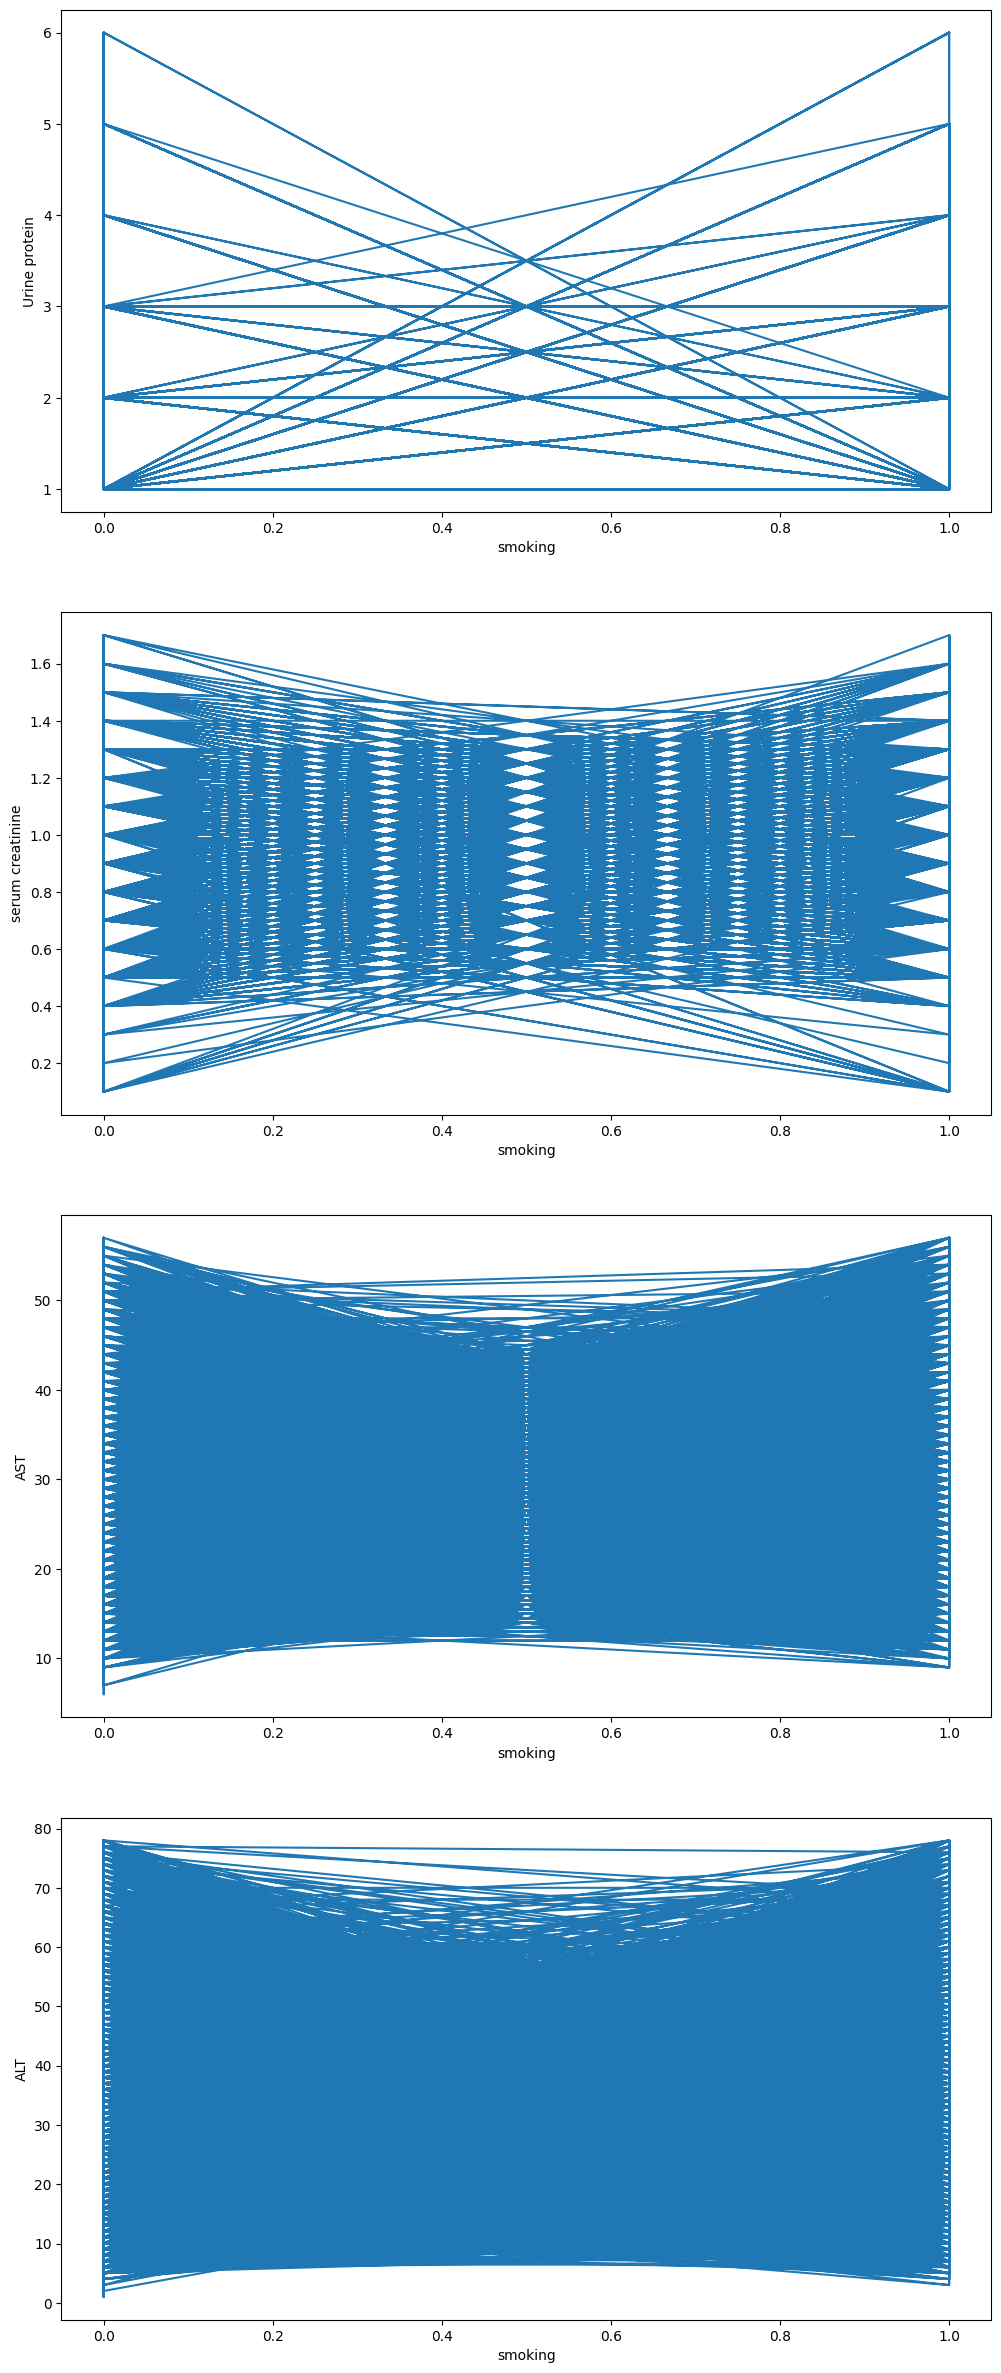

In [18]:
linePlotCreater(removed_df, "Urine protein", "serum creatinine", "AST", "ALT", "smoking")


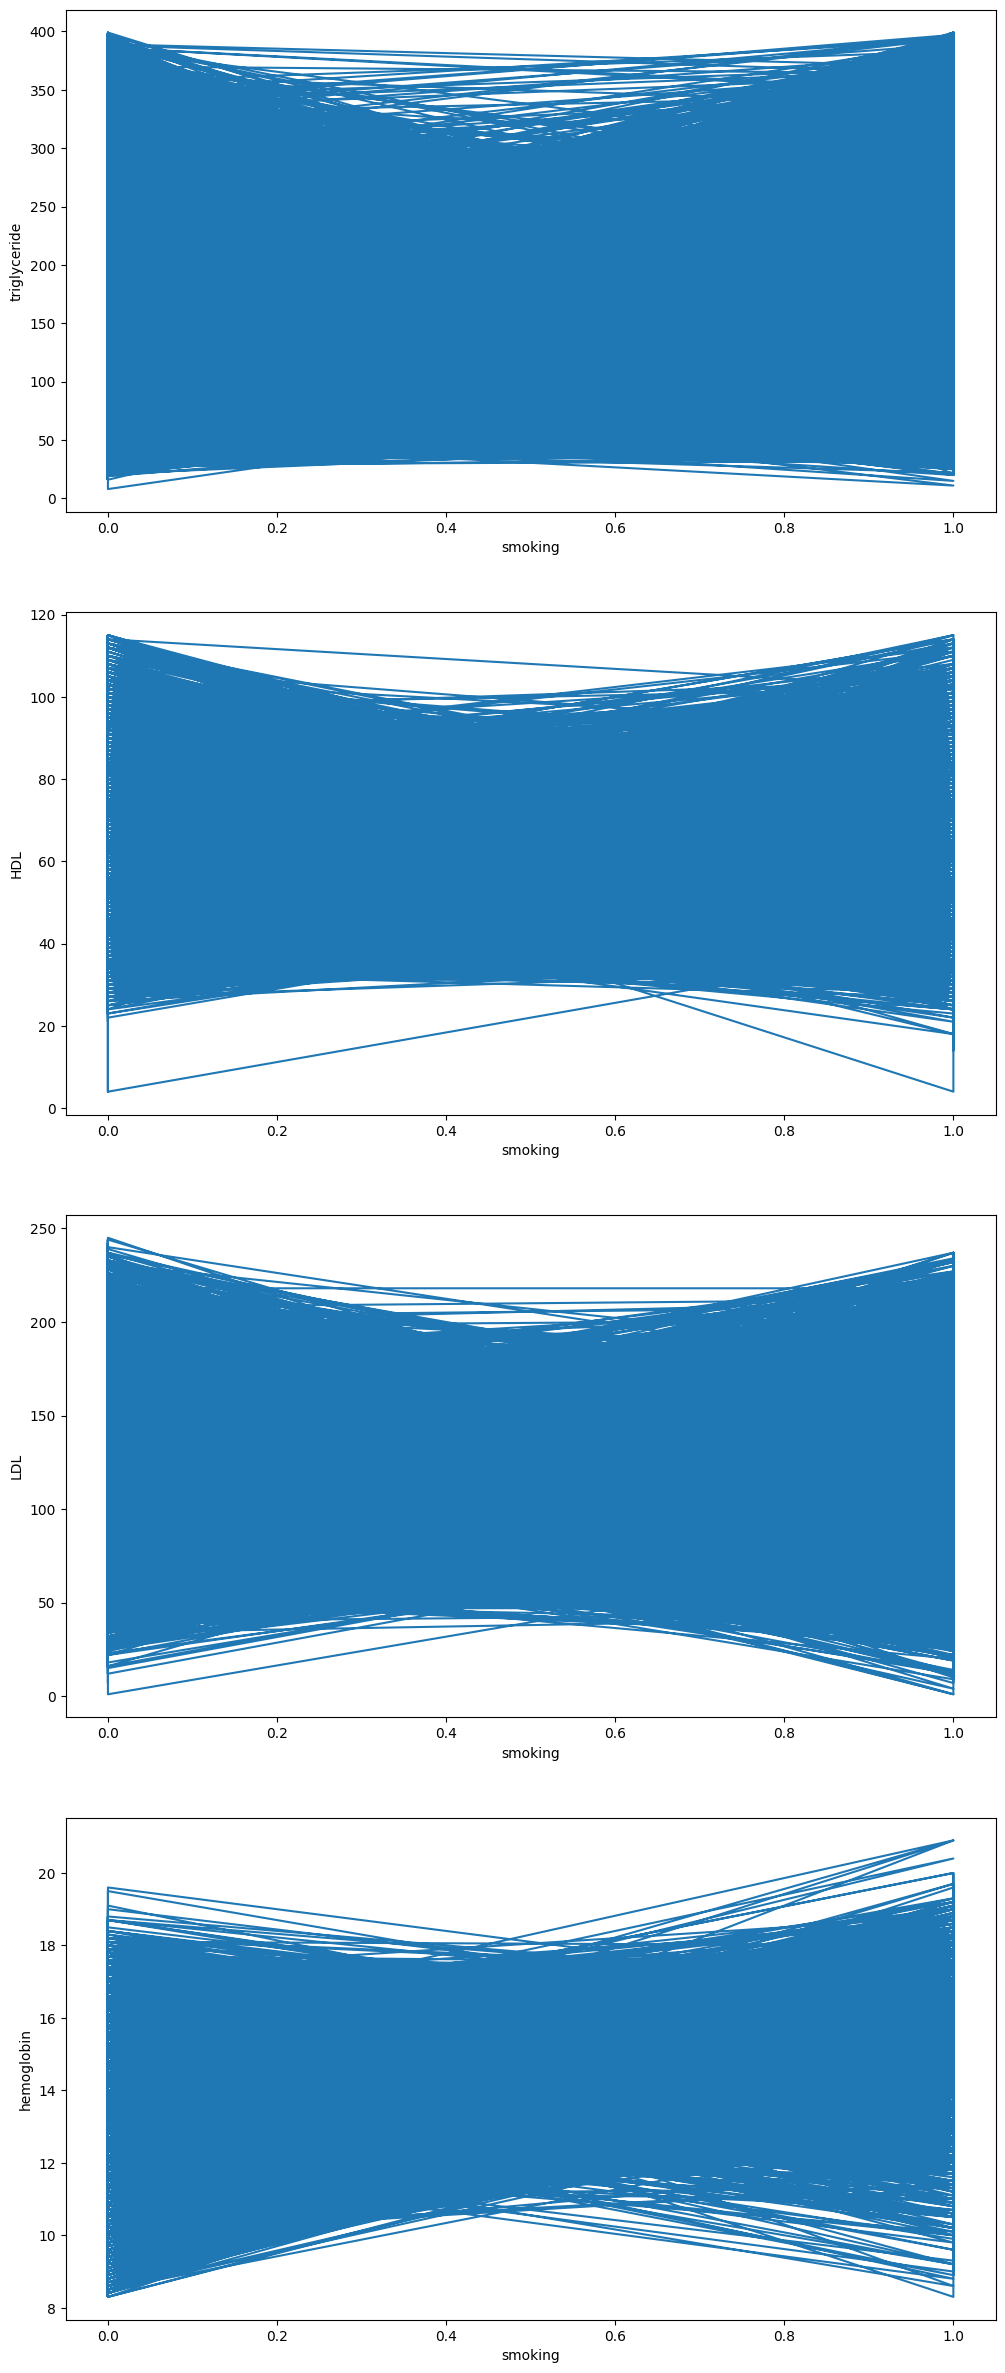

In [19]:
linePlotCreater(removed_df, "triglyceride", "HDL", "LDL", "hemoglobin", "smoking")

In [20]:
removed_df.head(5)

gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0       0   40         155          60       81.3             1.2   
1       0   40         160          60       81.0             0.8   
2       1   55         170          60       80.0             0.8   
3       1   40         165          70       88.0             1.5   
4       0   40         155          60       86.0             1.0   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  hemoglobin  \
0              1.0            1.0             1.0     114.0  ...        12.9   
1              0.6            1.0             1.0     119.0  ...        12.7   
2              0.8            1.0             1.0     138.0  ...        15.8   
3              1.5            1.0             1.0     100.0  ...        14.7   
4              1.0            1.0             1.0     120.0  ...        12.5   

   Urine protein  serum creatinine   AST   ALT   Gtp  oral  dental caries  \
0            1.0               0.7  18.0  19.0  27.0     1              0   
1            1.0               0.6  22.0  19.0  18.0     1              0   
2            1.0               1.0  21.0  16.0  22.0     1              0   
3            1.0               1.0  19.0  26.0  18.0     1              0   
4            1.0               0.6  16.0  14.0  22.0     1              0   

   tartar  smoking  
0       1        0  
1       1        0  
2       0        1  
3       1        0  
4       0        0  

[5 rows x 26 columns]

# Data Visualization, Exploration

<AxesSubplot: >

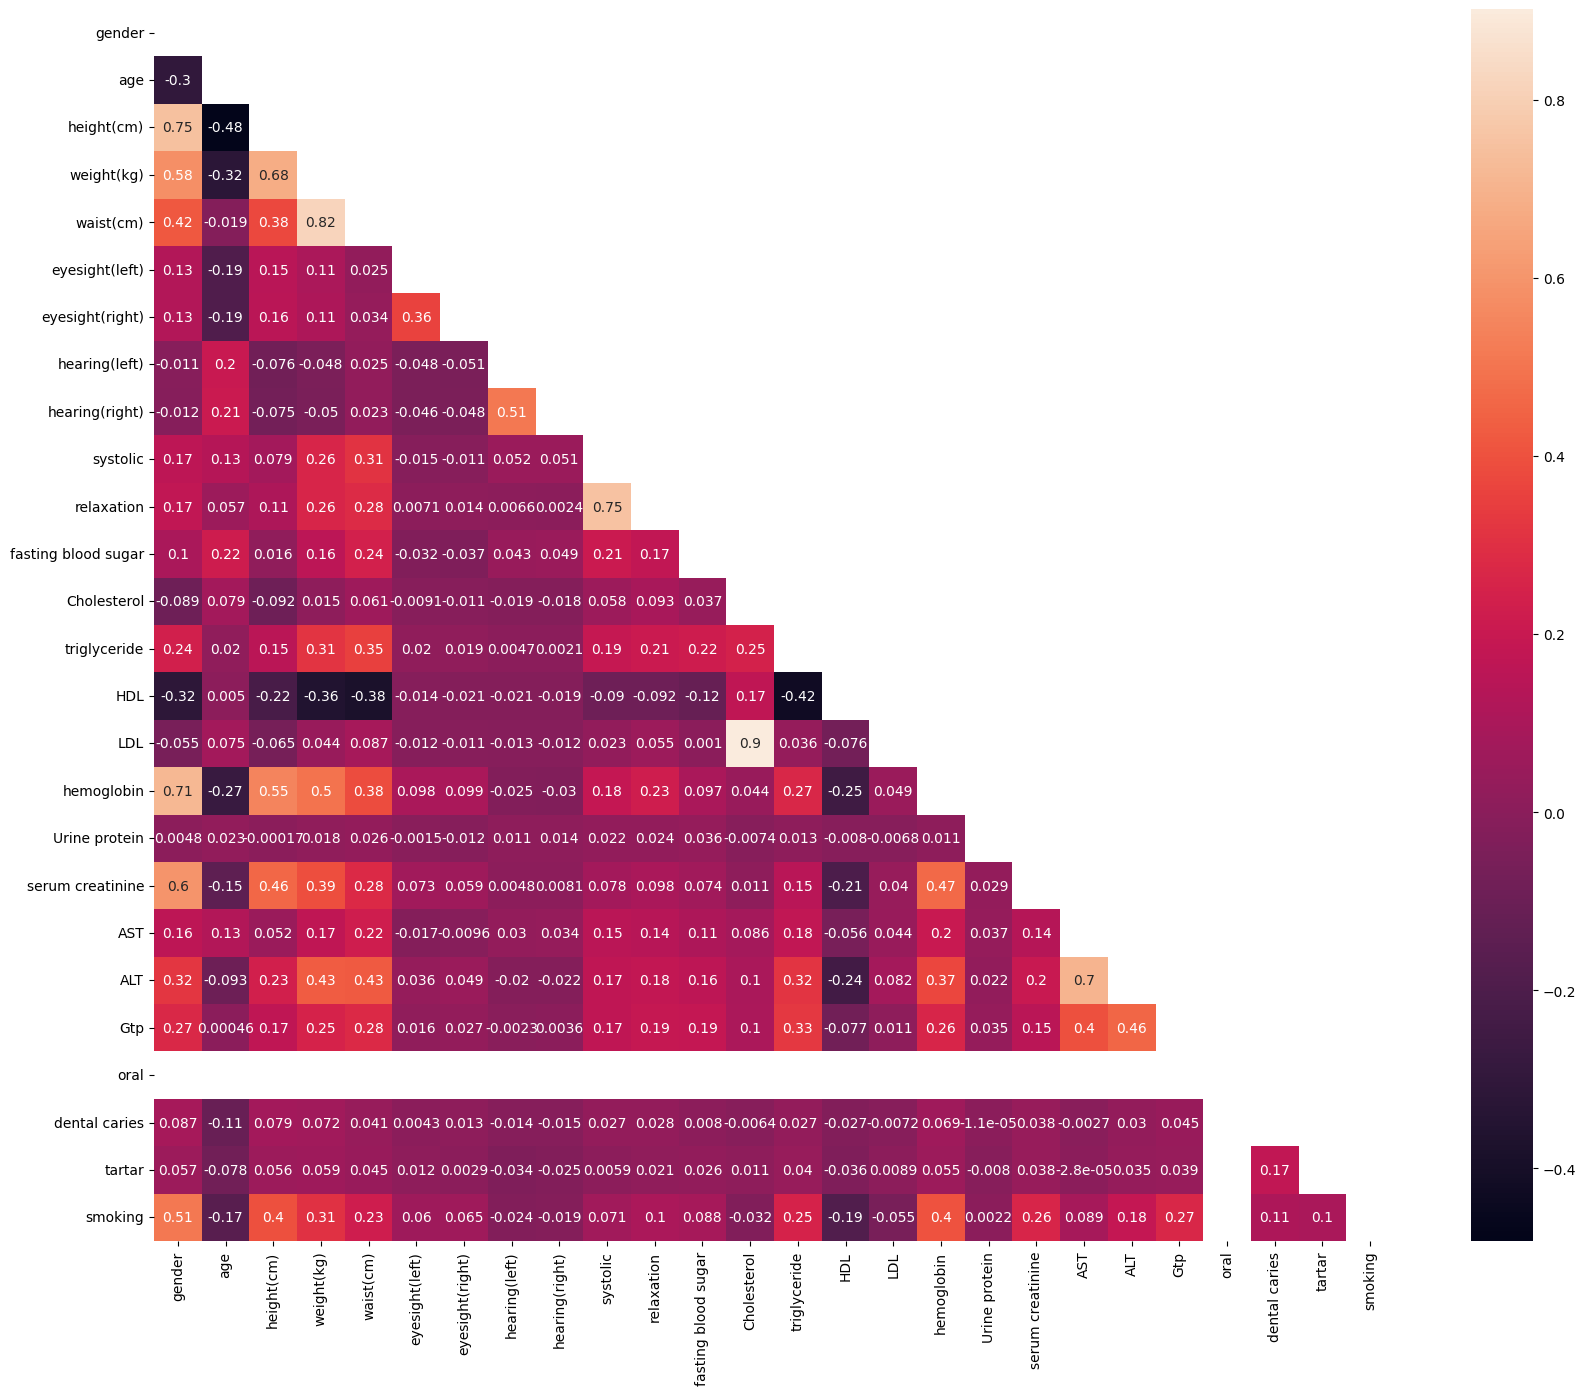

In [21]:
plt.figure(figsize=(20,16))
removed_df
corr = removed_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot = True)

#### There is a very strong positive correlation between waist-waight, hemoglobin-gender, relaxation-systolic, LDL-Cholesterol,
#### ALT-AST,   .
#### There is a strong positive correlation between smoking-gender, smoking-hemoglobin, serum creatinin-hemoglobin, Gtp-AST, 
#### Gtp-ALT

#### There is a strong negative correlation between height-age, weight-age, HDL-gender, HDL-Tryglyceride, HDL-weight, HDL-height
#### There is a weak negative correlation between hemoglobin--age, hemoglobin-HDL, ALT-HDL, smoking-age, smoking-HDL

<AxesSubplot: ylabel='gender'>

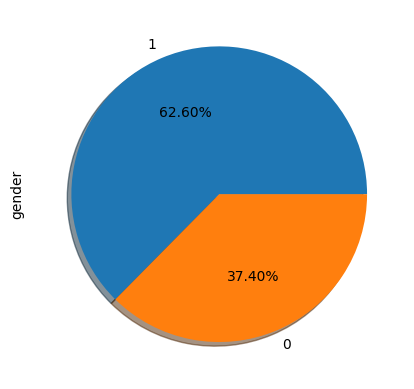

In [22]:
removed_df["gender"].value_counts().plot.pie(shadow=True, autopct="%1.2f%%")
## Males(1) are more than females(1)

<AxesSubplot: ylabel='smoking'>

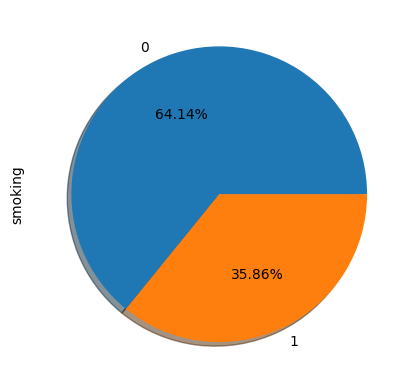

In [23]:
removed_df["smoking"].value_counts().plot.pie(shadow=True, autopct="%1.2f%%")
## Non-smokers(0) are more than smokers(1)

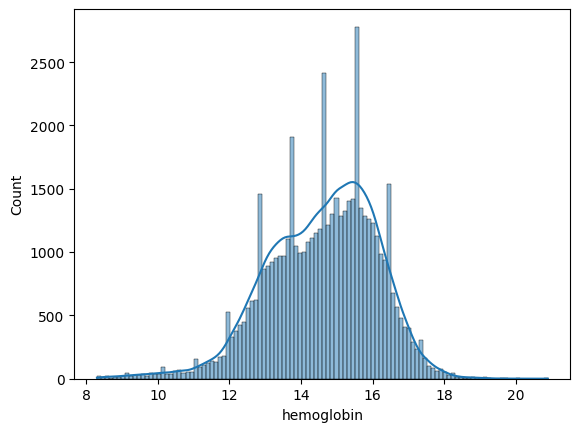

In [24]:
sns.histplot(x=removed_df["hemoglobin"], stat="count", kde=True)
plt.show()

# hemoglobin is almost distributed as normally.

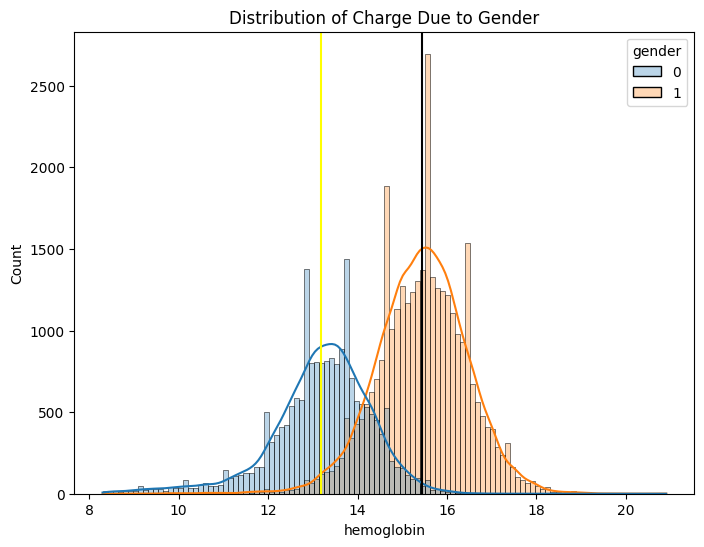

In [25]:
plt.figure(figsize=(8,6))

sns.histplot(x=removed_df["hemoglobin"], hue=removed_df["gender"], kde=True, hue_order=[0, 1], alpha=0.3)
plt.title("Distribution of Charge Due to Gender")

plt.axvline(x=removed_df.loc[removed_df["gender"]==0, "hemoglobin"].mean(), color="yellow")
plt.axvline(x=removed_df.loc[removed_df["gender"]==1, "hemoglobin"].mean(), color="black")
plt.show()

## Both histograms are almost distributed as a normally. Mean of male(1) hemoglobin are more than mean of female(0) hemoglobin

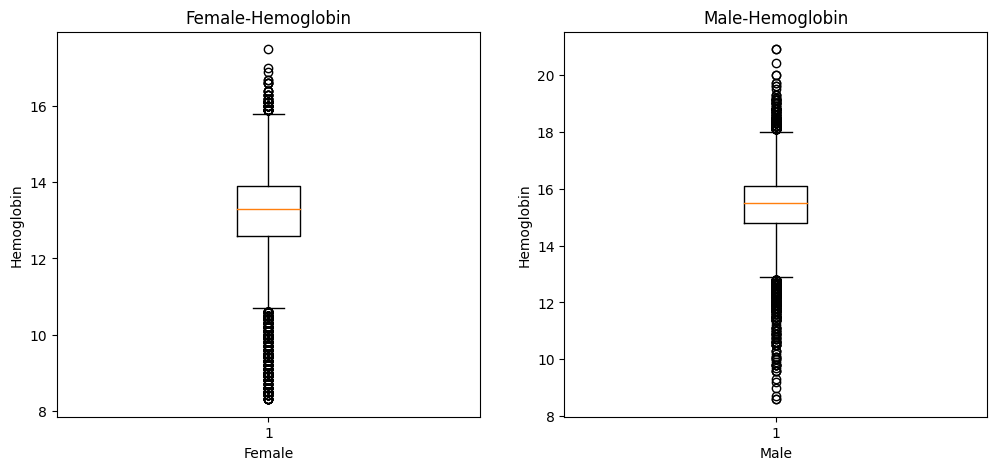

In [26]:
female = removed_df[removed_df["gender"]==0]
male = removed_df[removed_df["gender"]==1]


fig, axs = plt.subplots(1, 2, figsize=(12,5))

axs[0].boxplot(female["hemoglobin"])
axs[0].set_title("Female-Hemoglobin")
axs[0].set_xlabel("Female")
axs[0].set_ylabel("Hemoglobin")


axs[1].boxplot(male["hemoglobin"])
axs[1].set_title("Male-Hemoglobin")
axs[1].set_xlabel("Male")
axs[1].set_ylabel("Hemoglobin")

plt.show()

## Mean of male(1) hemoglobin are more than mean of female(0) hemoglobin.
## The distributon of Female-Hemoglobin is more than Male-Hemoglobin according to length of the boxes.


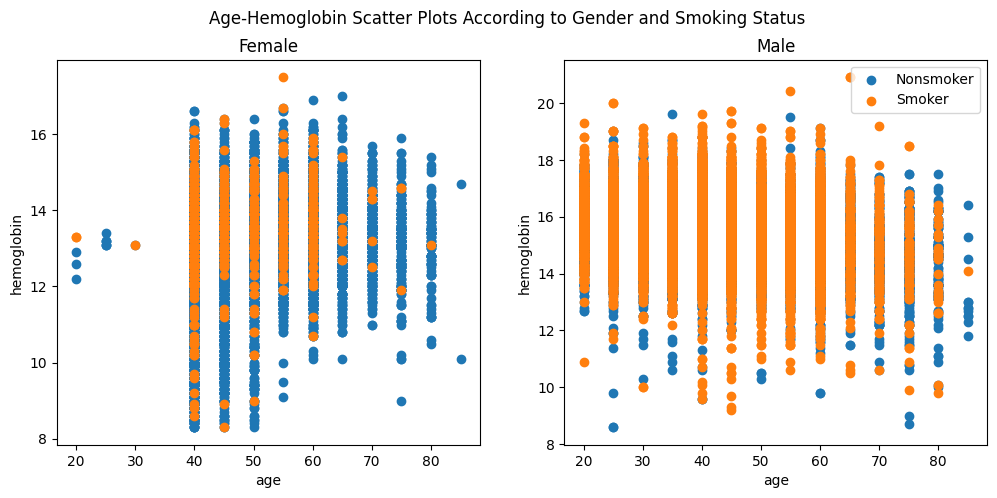

In [27]:
female_nonsmoker = removed_df[(removed_df["gender"]==0) & (removed_df["smoking"]==0)]
female_smoker = removed_df[(removed_df["gender"]==0) & (removed_df["smoking"]==1)]

male_nonsmoker = removed_df[(removed_df["gender"]==1) & (removed_df["smoking"]==0)]
male_smoker = removed_df[(removed_df["gender"]==1) & (removed_df["smoking"]==1)]

fig, axs = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Age-Hemoglobin Scatter Plots According to Gender and Smoking Status')

axs[0].scatter(female_nonsmoker["age"], female_nonsmoker["hemoglobin"], label="Nonsmoker")
axs[0].scatter(female_smoker["age"], female_smoker["hemoglobin"], label="Smoker")
axs[0].set_title("Female")
axs[0].set_xlabel("age")
axs[0].set_ylabel("hemoglobin")

axs[1].scatter(male_nonsmoker["age"], male_nonsmoker["hemoglobin"], label="Nonsmoker")
axs[1].scatter(male_smoker["age"], male_smoker["hemoglobin"], label="Smoker")
axs[1].set_title("Male")
axs[1].set_xlabel("age")
axs[1].set_ylabel("hemoglobin")

plt.legend()
plt.show()

# Hemoglobin is to start higher level when age is increaing in female. 

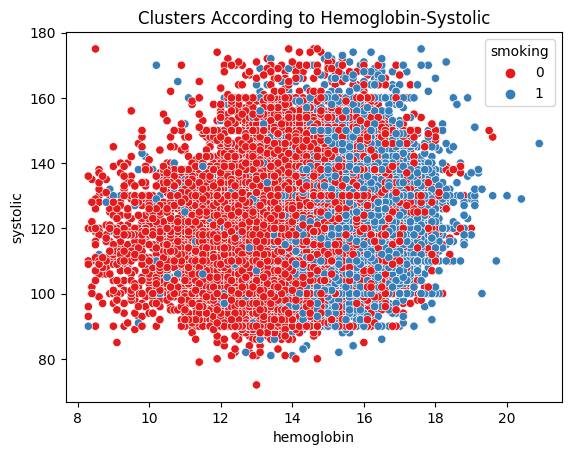

In [28]:
pal = sns.color_palette('Set1')

sns.scatterplot(data=removed_df, x='hemoglobin', y='systolic', hue='smoking', palette=pal[0:2])
plt.title('Clusters According to Hemoglobin-Systolic')
plt.show()

# Smokers tend to has more hemoglobin than non-smokers

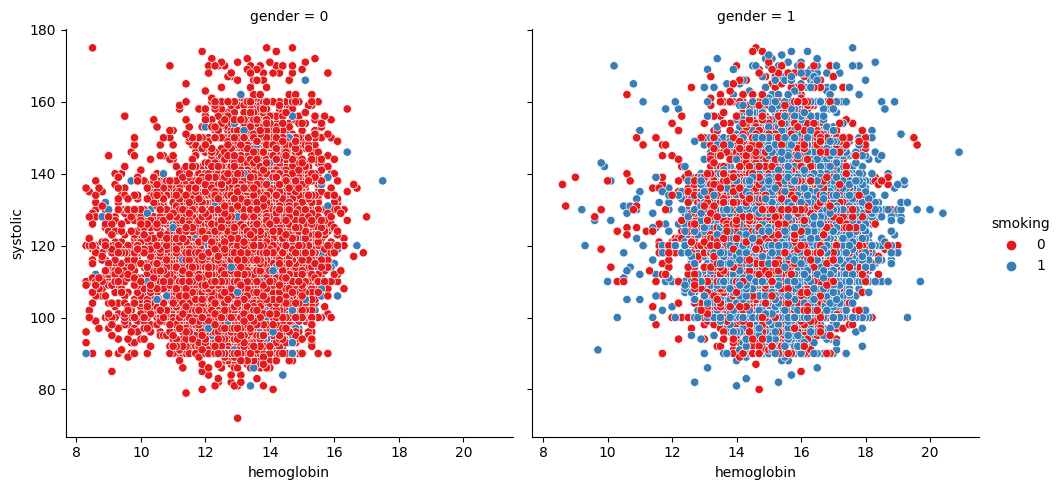

In [29]:
pal = sns.color_palette('Set1')

sns.relplot(data=removed_df, x='hemoglobin', y='systolic', hue='smoking', col="gender", kind="scatter", palette=pal[0:2])
plt.show()

# Smoking is more common in males. Very few female is smoking.

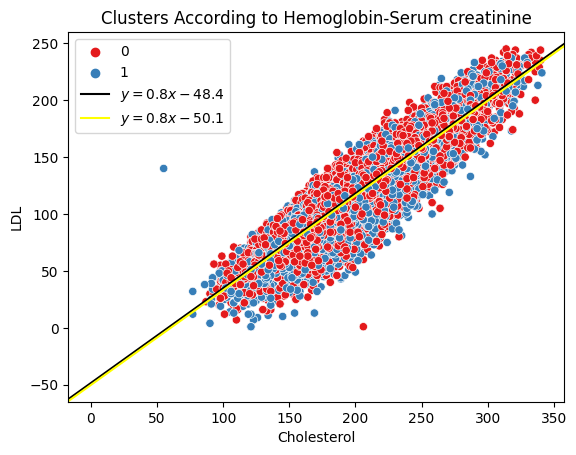

In [30]:
pal = sns.color_palette('Set1')

sns.scatterplot(data=removed_df, x='Cholesterol', y='LDL', hue='smoking', palette=pal[0:2])
plt.title('Clusters According to Hemoglobin-Serum creatinine')

m1, b1 = np.polyfit(removed_df.loc[removed_df["smoking"]==0, "Cholesterol"], removed_df.loc[removed_df["smoking"]==0, "LDL"], deg=1)
plt.axline(xy1=(0, b1), slope=m1, label=f'$y = {m1:.1f}x {b1:+.1f}$', color="black")

m2, b2 = np.polyfit(removed_df.loc[removed_df["smoking"]==1, "Cholesterol"], removed_df.loc[removed_df["smoking"]==1, "LDL"], deg=1)
plt.axline(xy1=(0, b2), slope=m2, label=f'$y = {m2:.1f}x {b2:+.1f}$', color ="yellow")

plt.legend()
plt.show()

## smokers and nonsmokers nearly have same correlation

# Clustering Part


## Data Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_array = scaler.fit_transform(removed_df)
scaled_array

df_scaled = pd.DataFrame(scaled_array, columns=dataframe.columns)
df_scaled.head(10)

gender       age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0 -1.293783 -0.337540   -1.037994   -0.432324  -0.037086        0.379127   
1 -1.293783 -0.337540   -0.495839   -0.432324  -0.070153       -0.439093   
2  0.772927  0.907778    0.588471   -0.432324  -0.180376       -0.439093   
3  0.772927 -0.337540    0.046316    0.366772   0.701408        0.992792   
4 -1.293783 -0.337540   -1.037994   -0.432324   0.480962       -0.029983   
5  0.772927 -1.167751    1.672781    0.766320   0.370739        0.379127   
6  0.772927 -0.337540   -0.495839   -0.432324   0.425851       -0.029983   
7 -1.293783  0.492672   -1.580149   -0.432324   0.370739       -0.643648   
8  0.772927  0.077566    1.130626    0.766320   0.811632       -0.029983   
9  0.772927 -1.167751    1.130626   -0.032776   0.811632        0.992792   

   eyesight(right)  hearing(left)  hearing(right)  systolic  ...  hemoglobin  \
0        -0.019337      -0.159288       -0.161755 -0.531085  ...   -1.115598   
1        -0.844575      -0.159288       -0.161755 -0.153926  ...   -1.247146   
2        -0.431956      -0.159288       -0.161755  1.279281  ...    0.791858   
3         1.012210      -0.159288       -0.161755 -1.587132  ...    0.068340   
4        -0.019337      -0.159288       -0.161755 -0.078494  ...   -1.378695   
5         0.393282      -0.159288       -0.161755  0.524962  ...    1.054955   
6        -0.019337      -0.159288       -0.161755 -0.380222  ...    1.581149   
7        -0.431956      -0.159288       -0.161755 -0.455653  ...   -0.589403   
8        -0.019337      -0.159288       -0.161755 -0.606517  ...    0.923406   
9         1.012210      -0.159288       -0.161755  0.675825  ...    0.068340   

   Urine protein  serum creatinine       AST       ALT       Gtp  oral  \
0      -0.206565         -0.964510 -0.826460 -0.382281 -0.239338   0.0   
1      -0.206565         -1.494188 -0.283867 -0.382281 -0.482905   0.0   
2      -0.206565          0.624523 -0.419515 -0.616570 -0.374653   0.0   
3      -0.206565          0.624523 -0.690812  0.164393 -0.482905   0.0   
4      -0.206565         -1.494188 -1.097757 -0.772763 -0.374653   0.0   
5      -0.206565          1.683878 -0.826460  0.242489 -0.076959   0.0   
6      -0.206565         -0.964510 -0.419515  0.242489  0.085419   0.0   
7      -0.206565         -0.434833  0.936968  0.554874 -0.591157   0.0   
8      -0.206565         -0.434833  0.258727  0.008200  0.734931   0.0   
9      -0.206565         -0.964510  1.479562  1.726318  0.031293   0.0   

   dental caries    tartar   smoking  
0      -0.519121  0.896274 -0.747701  
1      -0.519121  0.896274 -0.747701  
2      -0.519121 -1.115731  1.337434  
3      -0.519121  0.896274 -0.747701  
4      -0.519121 -1.115731 -0.747701  
5      -0.519121  0.896274 -0.747701  
6       1.926335  0.896274  1.337434  
7      -0.519121 -1.115731 -0.747701  
8      -0.519121 -1.115731 -0.747701  
9      -0.519121 -1.115731 -0.747701  

[10 rows x 26 columns]

## Kmeans

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist


inertias = []
distortions = []
models = []

for k in range(1,21):
    KMeanModel = KMeans(n_clusters=k)
    KMeanModel = KMeanModel.fit(scaled_array)
    models.append(KMeanModel)
    
    inertias.append(KMeanModel.inertia_)
    distortions.append(sum(np.min(cdist(scaled_array, KMeanModel.cluster_centers_, 'euclidean'), axis=1)) / scaled_array.shape[0])
        

### Elbow Method for KMeans

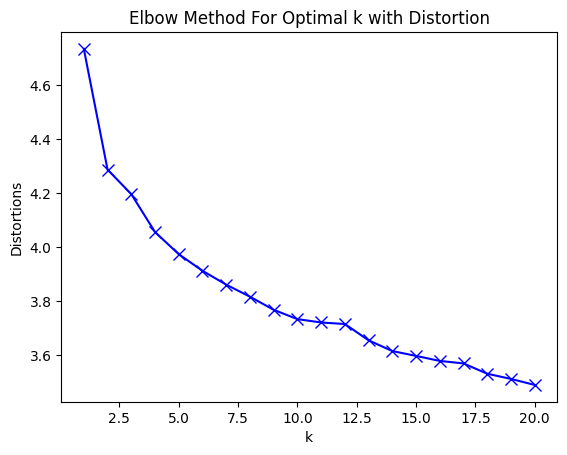

In [33]:
plt.plot(list(range(1,21)), distortions, marker="x", color="blue", markersize=8)
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k with Distortion')
plt.show()

## There is an elbow at k=2. We can say that there is 2 cluster. Smoker and Non smoker

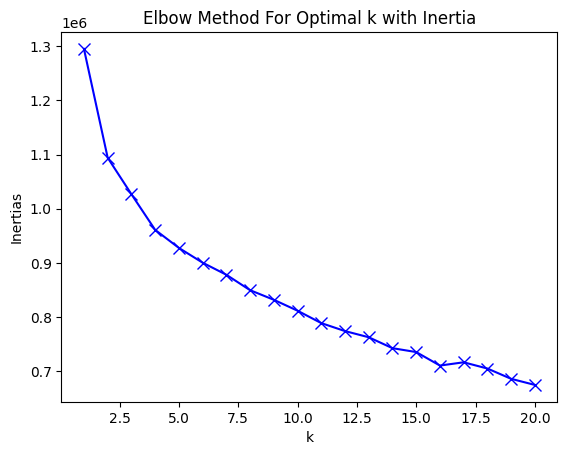

In [34]:
plt.plot(list(range(1,21)), inertias, marker="x", color="blue", markersize=8)
plt.xlabel('k')
plt.ylabel('Inertias')
plt.title('Elbow Method For Optimal k with Inertia')
plt.show()

## There is an elbow at k=2. We can say that there is 2 cluster. Smoker and Non smoker

### Sillhouette Plot for KMeans

2 
**********************
3 
**********************
4 
**********************
5 
**********************
6 
**********************
7 
**********************


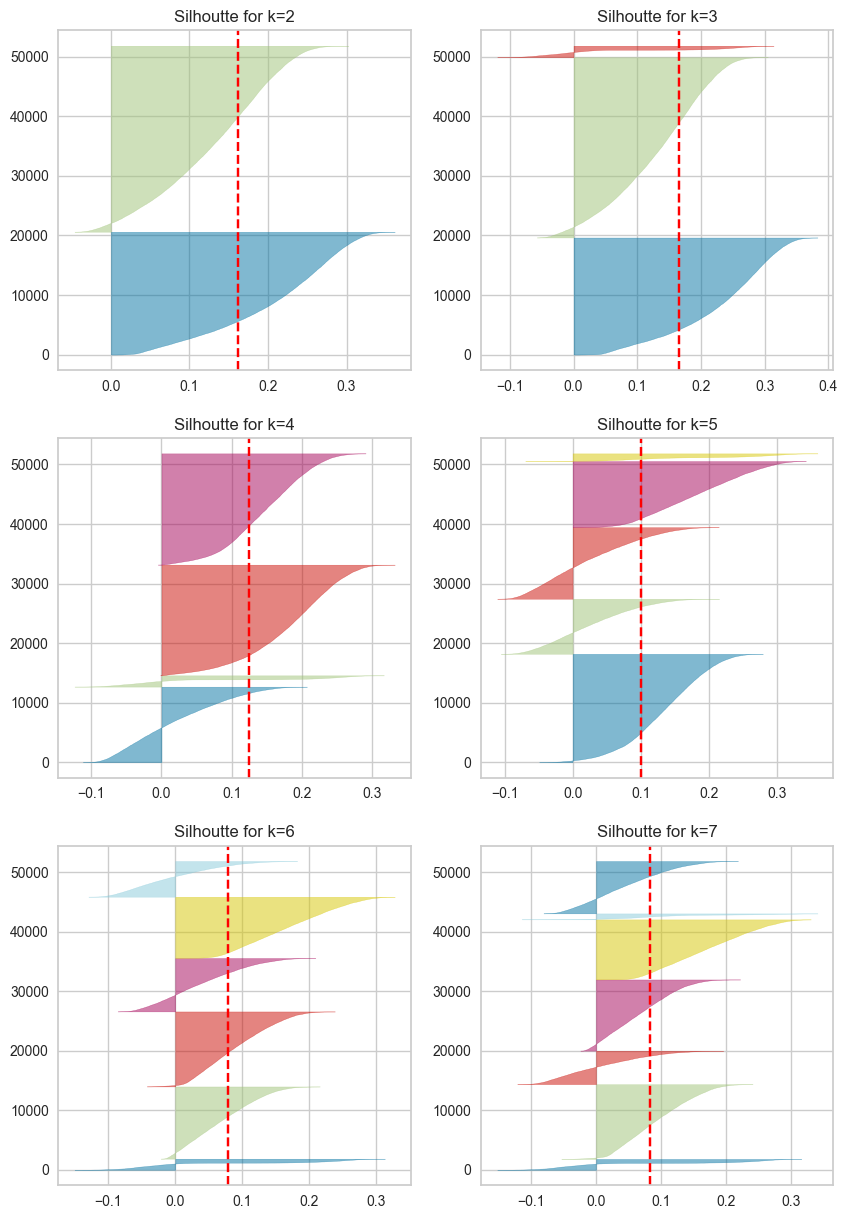

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(10,15))

for i in range(2,8):
    print(i, "\n**********************")

    km = KMeans(n_clusters=i)
    r, c = (i//2)-1, i%2

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[r][c])
    ax[r][c].set_title(f"Silhoutte for k={i}")
    visualizer.fit(df_scaled)
    

# All of this, the best K may be 2-3. I want to choose k=2 because fluctuations between clusters are minimal rather than k=3

In [36]:
trial = removed_df[["hemoglobin", "systolic"]]

scaler = StandardScaler()
scaled_Cho_LDL = scaler.fit_transform(trial)


KMeanModel = KMeans(n_clusters=2)
KMeanModel = KMeanModel.fit(scaled_Cho_LDL)
trial["trialClu"] = KMeanModel.labels_

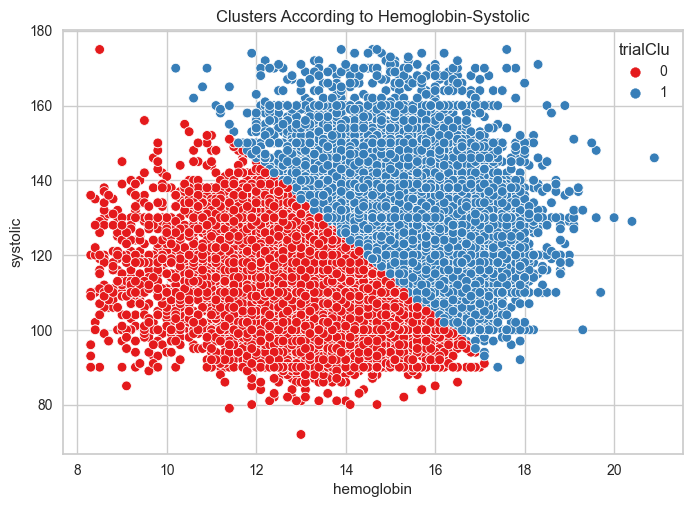

In [37]:
pal = sns.color_palette('Set1')

sns.scatterplot(data=trial, x='hemoglobin', y='systolic', hue='trialClu', palette=pal[0:2])
plt.title('Clusters According to Hemoglobin-Systolic')
plt.show()


In [38]:
trial = removed_df[["Cholesterol", "LDL"]]

scaler = StandardScaler()
scaled_Cho_LDL = scaler.fit_transform(trial)


KMeanModel = KMeans(n_clusters=2)
KMeanModel = KMeanModel.fit(scaled_Cho_LDL)
trial["trialClu"] = KMeanModel.labels_

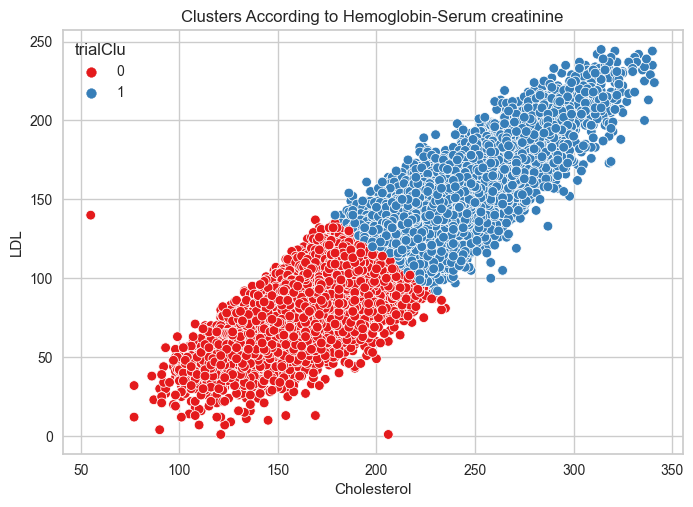

In [39]:
pal = sns.color_palette('Set1')

sns.scatterplot(data=trial, x='Cholesterol', y='LDL', hue='trialClu', palette=pal[0:2])
plt.title('Clusters According to Hemoglobin-Serum creatinine')
plt.show()



# Split Data
### Data must be splitted as train and test part. Also, each of them must be splitted as x and y.

In [40]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(removed_df, test_size=0.3 )

x_train = train[train.columns.difference(["smoking"])]
y_train = train["smoking"]

x_test = test[test.columns.difference(["smoking"])]
y_test = test["smoking"]

# Classification Part
### KNN Classification

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve



def accuracy_rates_with_minkowski(k_beginning, k_finish, p_minkowski):

    k_list = range(k_beginning, k_finish, 2)
    test_error = []
    accuracy_rates = []

    for k in k_list:
        KNN_Classifier = KNeighborsClassifier(n_neighbors=k, metric="minkowski", p = p_minkowski)
        KNN_Classifier.fit(x_train, y_train)
        
        predict = KNN_Classifier.predict(x_test)
        
        f1score = f1_score(predict, y_test)

        accuracy = accuracy_score(y_test, predict)
        accuracy_rates.append(accuracy)
        
        error = 1-f1score
        test_error.append(error)
        
        print(f"************************\nk: {k}")
        print(f"f1 score: {f1score}")
        print(f"accuracy_score: {accuracy}")
        print(f"error: {error}")

        
        
    return accuracy_rates, test_error
    

## KNN For p=1

In [42]:
acc, err = accuracy_rates_with_minkowski(3,20,1)

************************
k: 3
f1 score: 0.5859425510298328
accuracy_score: 0.7115743421475905
error: 0.41405744897016716
************************
k: 5
f1 score: 0.5895564289724874
accuracy_score: 0.7178150936112719
error: 0.4104435710275126
************************
k: 7
f1 score: 0.5867092771877056
accuracy_score: 0.7171073795277617
error: 0.4132907228122944
************************
k: 9
f1 score: 0.5888018128599753
accuracy_score: 0.7198095605738918
error: 0.41119818714002465
************************
k: 11
f1 score: 0.5837991473235433
accuracy_score: 0.7173647301035836
error: 0.4162008526764567
************************
k: 13
f1 score: 0.5888170406998859
accuracy_score: 0.7218040275365116
error: 0.41118295930011406
************************
k: 15
f1 score: 0.5848895629917529
accuracy_score: 0.7182654571189603
error: 0.4151104370082471
************************
k: 17
f1 score: 0.5844713971922452
accuracy_score: 0.7200669111497137
error: 0.41552860280775483
************************
k: 19
f

The best K = 5, the accuracy at that point is 0.7178150936112719


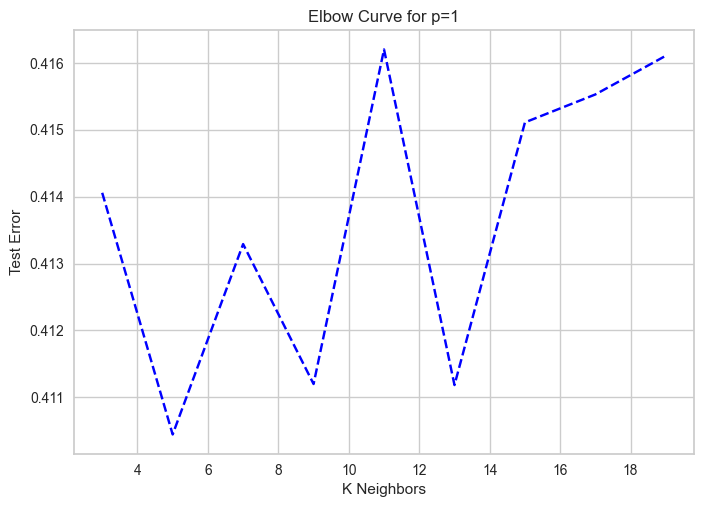

In [43]:
k_list = range(3,20,2)

plt.plot(k_list, err, color="blue", linestyle="dashed", marker="x", markerfacecolor="red", markersize=5)
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow Curve for p=1')

min_y1 = min(err)
best_k1 = k_list[err.index(min_y1)]

index1 = int(((best_k1-3)/2))
print(f"The best K = {best_k1}, the accuracy at that point is {acc[index1]}")

### Confussion Matrix for KNN with p=1


Text(70.72222222222221, 0.5, 'Predicted')

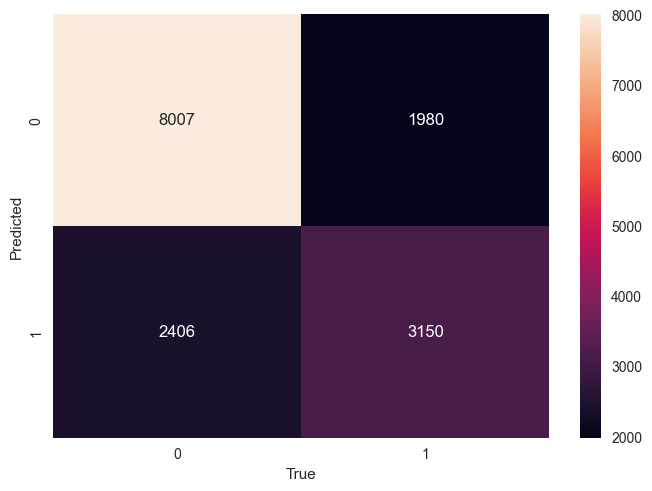

In [44]:

KNN_Classifier1 = KNeighborsClassifier(n_neighbors=best_k1, metric="minkowski", p=1)
KNN_Classifier1.fit(x_train, y_train)
predict_knn1 = KNN_Classifier1.predict(x_test)

conf_matrix_knn1 = confusion_matrix(y_test, predict_knn1)
sns.heatmap(conf_matrix_knn1, annot=True, fmt="g")

plt.xlabel("True")
plt.ylabel("Predicted")



In [45]:
TN1 = conf_matrix_knn1[0][0]
FN1 = conf_matrix_knn1[0][1]
FP1 = conf_matrix_knn1[1][0]
TP1 = conf_matrix_knn1[0][0]

print("precision\t: ", TP1/(TP1+FP1))
print("recall\t\t: ",  TP1/(TP1+FN1))

precision	:  0.7689426678190723
recall		:  0.8017422649444278


### ROC Curve for KNN with p=1

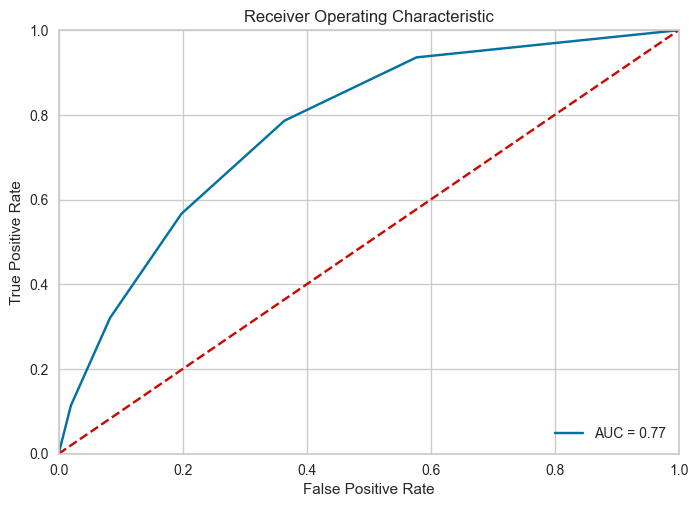

In [46]:

probs1 = KNN_Classifier1.predict_proba(x_test)
preds1 = probs1[:,1]

fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, preds1)
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Precision Recall Curve for KNN with p=1

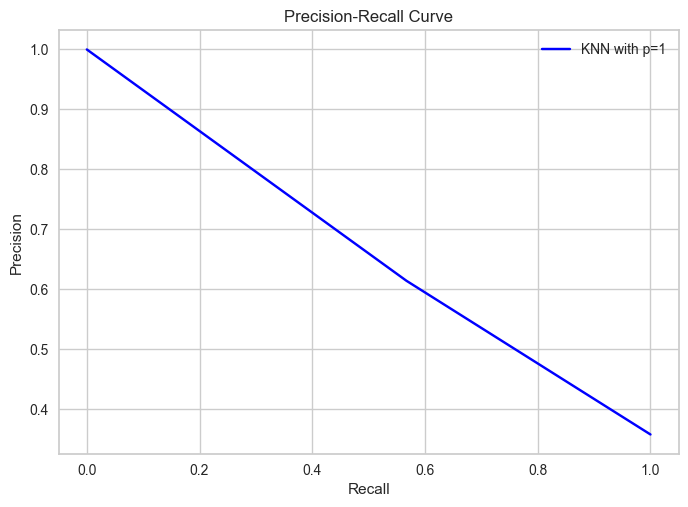

In [47]:
from sklearn.metrics import precision_recall_curve

precision_lr1, recall_lr1, thresholds_lr1 = precision_recall_curve(y_test, predict_knn1)

plt.plot(recall_lr1, precision_lr1, color="blue", label="KNN with p=1")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend()
plt.show()


## KNN For p=2



In [48]:
acc2, err2 = accuracy_rates_with_minkowski(3,20,2)

************************
k: 3
f1 score: 0.5869344881599557
accuracy_score: 0.7115743421475905
error: 0.41306551184004425
************************
k: 5
f1 score: 0.5858679525222553
accuracy_score: 0.7126680820948337
error: 0.4141320474777447
************************
k: 7
f1 score: 0.587533774340818
accuracy_score: 0.7151772502090974
error: 0.412466225659182
************************
k: 9
f1 score: 0.5833097060769303
accuracy_score: 0.716335327800296
error: 0.41669029392306967
************************
k: 11
f1 score: 0.5803639120545868
accuracy_score: 0.7151129125651419
error: 0.4196360879454132
************************
k: 13
f1 score: 0.5754653937947494
accuracy_score: 0.7138904973299878
error: 0.42453460620525063
************************
k: 15
f1 score: 0.5703334610962054
accuracy_score: 0.7115100045036351
error: 0.4296665389037946
************************
k: 17
f1 score: 0.5743145743145742
accuracy_score: 0.7153059254970083
error: 0.4256854256854258
************************
k: 19
f1 sc

The best K = 7, the accuracy at that point is 0.7151772502090974


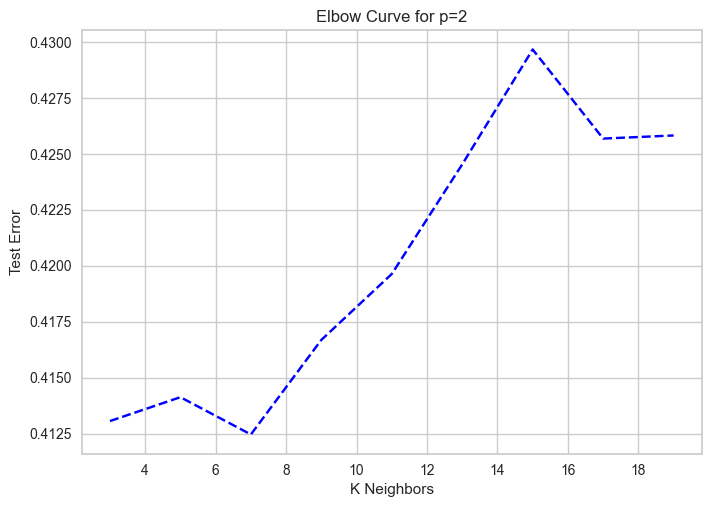

In [49]:
k_list = range(3,20,2)

plt.plot(k_list, err2, color="blue", linestyle="dashed", marker="x", markerfacecolor="red", markersize=5)
plt.xlabel('K Neighbors')
plt.ylabel('Test Error')
plt.title('Elbow Curve for p=2')

min_y2 = min(err2)
best_k2 = k_list[err2.index(min_y2)]

index2 = int(((best_k2-3)/2))
print(f"The best K = {best_k2}, the accuracy at that point is {acc2[index2]}")

### Confussion Matrix For KNN with p=2

<AxesSubplot: >

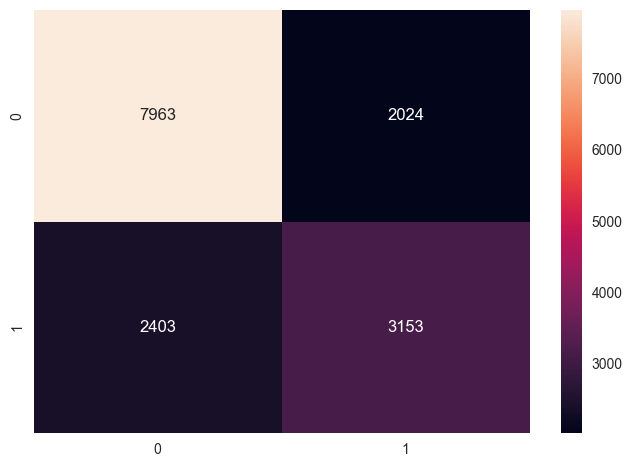

In [50]:

KNN_Classifier2 = KNeighborsClassifier(n_neighbors=best_k2, metric="minkowski", p=2)
KNN_Classifier2.fit(x_train, y_train)
predict_knn2 = KNN_Classifier2.predict(x_test)

conf_matrix_knn2 = confusion_matrix(y_test, predict_knn2)
sns.heatmap(conf_matrix_knn2, annot=True, fmt="g")



In [51]:
TN2 = conf_matrix_knn2[0][0]
FN2 = conf_matrix_knn2[0][1]
FP2 = conf_matrix_knn2[1][0]
TP2 = conf_matrix_knn2[0][0]

print("precision\t: ", TP2/(TP2+FP2))
print("recall\t\t: ",  TP2/(TP2+FN2))

precision	:  0.7681844491607177
recall		:  0.7973365374987483


### ROC Curve for KNN with p=2

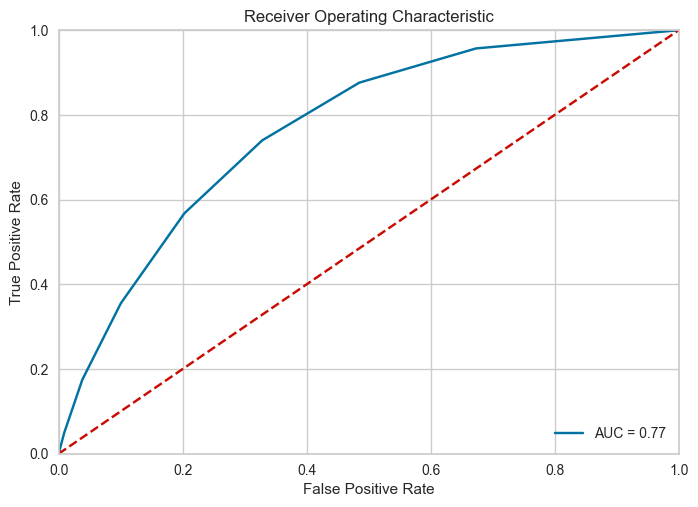

In [52]:

probs2 = KNN_Classifier2.predict_proba(x_test)
preds2 = probs2[:,1]

fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc = 'lower right')
plt.show()


### Precision Recall Curve for KNN with p=2

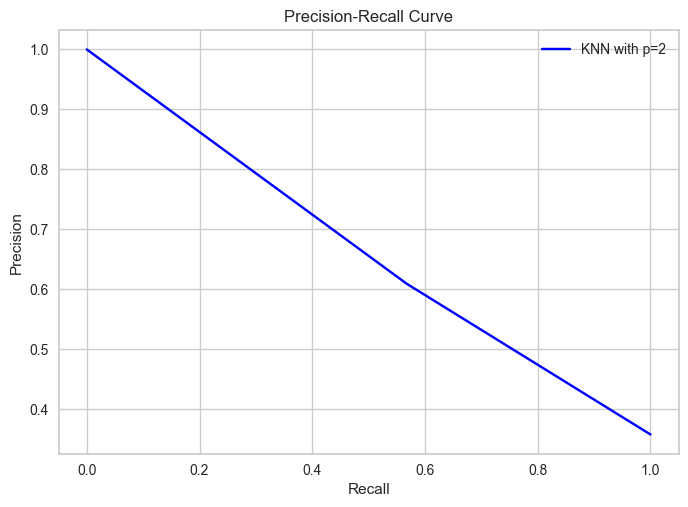

In [53]:
from sklearn.metrics import precision_recall_curve

precision_lr2, recall_lr2, thresholds_lr2 = precision_recall_curve(y_test, predict_knn2)

plt.plot(recall_lr2, precision_lr2, color="blue", label="KNN with p=2")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend()
plt.show()


## Precision-Recall Curve Comparison

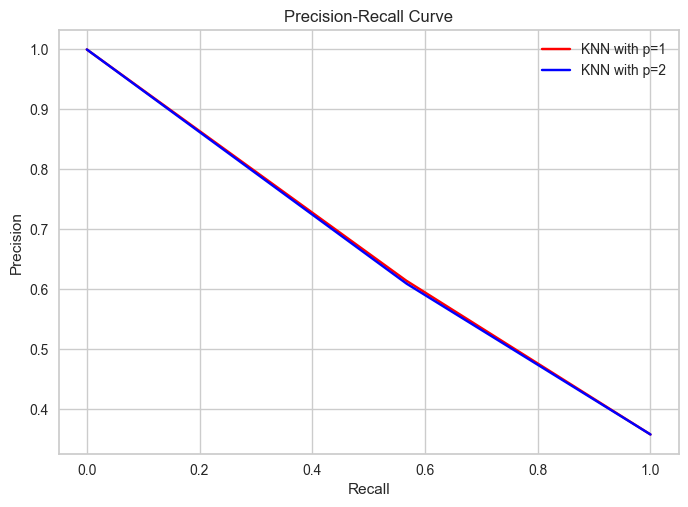

In [54]:
plt.plot(recall_lr1, precision_lr1, color="red", label="KNN with p=1")
plt.plot(recall_lr2, precision_lr2, color="blue", label="KNN with p=2")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend()
plt.show()

## KNN p=1 gives better result than KNN p=2 by the area under the curve.

## Error - K value for L1 and L2

Best values for k are seen at Manhatten Distance. So that, k values should be chosen by using Manhattan Distance.
We should choose k=5. Error is minimum at that point.


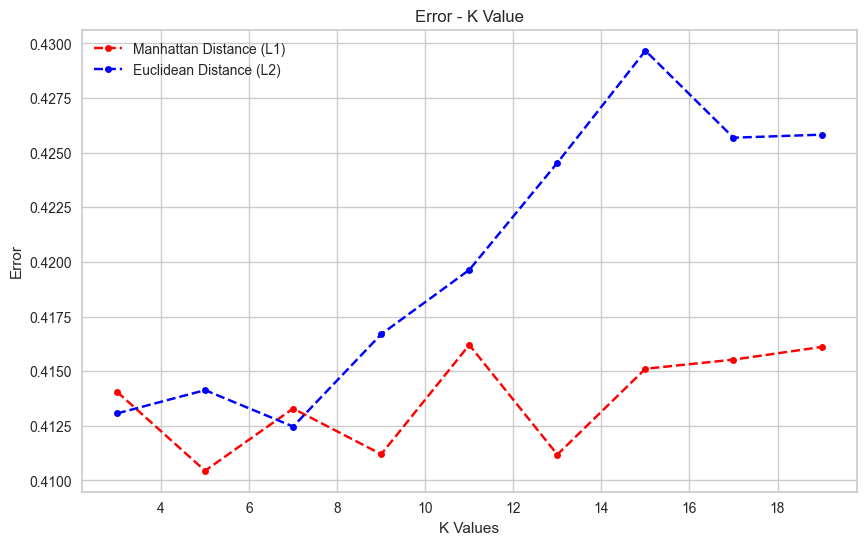

In [55]:
plt.figure(figsize=(10,6))
plt.plot(range(3,20,2), err, color="red", linestyle="dashed", marker="o", label="Manhattan Distance (L1)", markerfacecolor="red", markersize=5)
plt.plot(range(3,20,2), err2, color="blue", linestyle="dashed", marker="o", label="Euclidean Distance (L2)", markerfacecolor="blue", markersize=5)
plt.legend()
plt.title("Error - K Value")
plt.xlabel("K Values")
plt.ylabel("Error")

print("Best values for k are seen at Manhatten Distance. So that, k values should be chosen by using Manhattan Distance.")


min_y = min(err)
best_k = k_list[err.index(min_y)]
indexx = int(((best_k-3)/2))
             
print(f"We should choose k={best_k}. Error is minimum at that point.")



# LOGISTIC REGRESSION

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Scaling the data

In [57]:
from sklearn.linear_model import LogisticRegression

lg_model = LogisticRegression()
lg_model.fit(x_train,y_train) # We create our logistic regression model with splitted train and test datas.

score_test = lg_model.score(x_test,y_test) # Here is our test score. 

score_train = lg_model.score(x_train,y_train) # Here is our train score.

print("Test score: ", score_test)
print("Train score: ", score_train)


Test score:  0.7461879945956379
Train score:  0.7496277505101197


### Confussion Matrix for Logistic Regression

<AxesSubplot: >

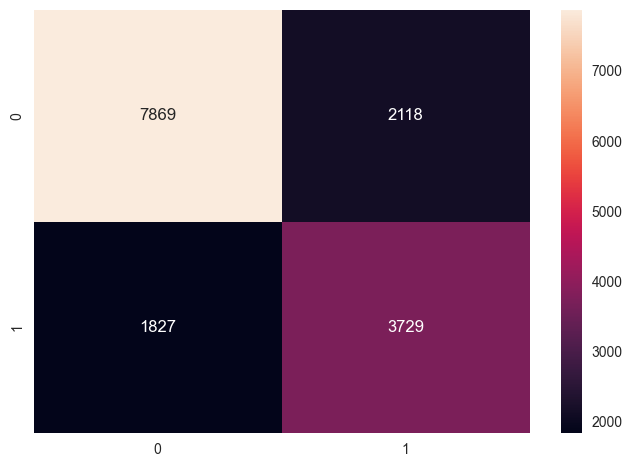

In [58]:
from sklearn.metrics import confusion_matrix

prediction_lg = lg_model.predict(x_test)
conf_matrix_lg = confusion_matrix(y_test, prediction_lg)
sns.heatmap(conf_matrix_lg, annot=True, fmt="g")


In [59]:
TNlr = conf_matrix_lg[0][0]
FNlr = conf_matrix_lg[0][1]
FPlr = conf_matrix_lg[1][0]
TPlr = conf_matrix_lg[0][0]

print("precision\t: ", TPlr/(TPlr+FPlr))
print("recall\t\t: ",  TPlr/(TPlr+FNlr))

precision	:  0.8115717821782178
recall		:  0.7879243015920697


In [60]:
acs = accuracy_score(y_test,prediction_lg)
print("The accuracy score is : ", acs)

The accuracy score is :  0.7461879945956379


### ROC Curve

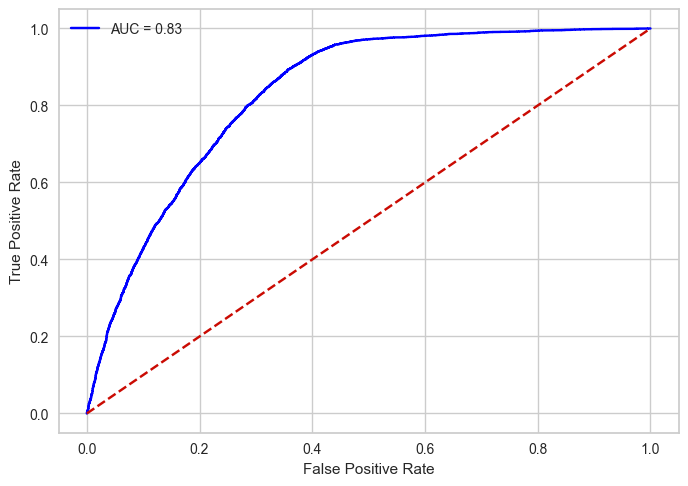

In [61]:
proba = lg_model.predict_proba(x_test)
preds = proba[:,1]

fpr_lg, tpr_lg, threshold_lg = metrics.roc_curve(y_test,  preds)
roc_auc_lg = metrics.auc(fpr_lg, tpr_lg)


plt.plot(fpr_lg, tpr_lg, "blue",  label = 'AUC = %0.2f' % roc_auc_lg)
plt.plot([0, 1], [0, 1],"r--")


plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.legend()
plt.show()



### Precision-Recall Curve for Logistic Regression

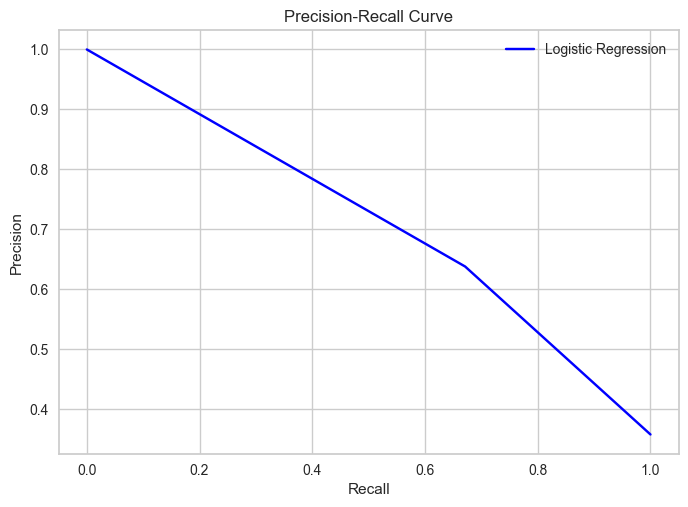

In [62]:
from sklearn.metrics import precision_recall_curve

precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, prediction_lg)

plt.plot(recall_lr, precision_lr, color="blue", label="Logistic Regression")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend()
plt.show()


## Precision-Recall Comparision for 3 Model

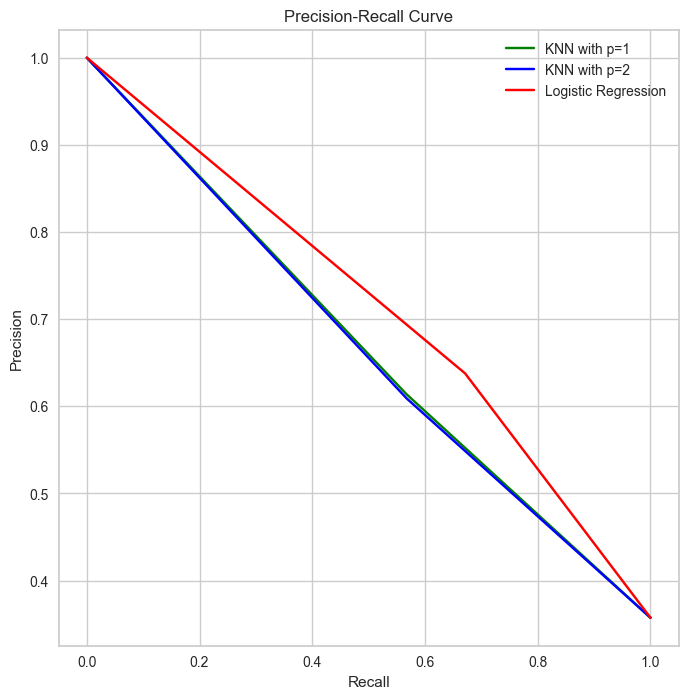

In [63]:
plt.figure(figsize=(8,8))

plt.plot(recall_lr1, precision_lr1, color="green", label="KNN with p=1")
plt.plot(recall_lr2, precision_lr2, color="blue", label="KNN with p=2")
plt.plot(recall_lr, precision_lr, color="red", label="Logistic Regression")


plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")


plt.legend()
plt.show()

### We want to reach to most top right point. An Ideal model will have high precision and high recall. All the points should be labeled correctly. The area under the curve can be a guide to determine which model is the best one. As a result the best result with different thresholds are seen always with Logistich Regression.

## ROC Curve Comparision for 3 Model

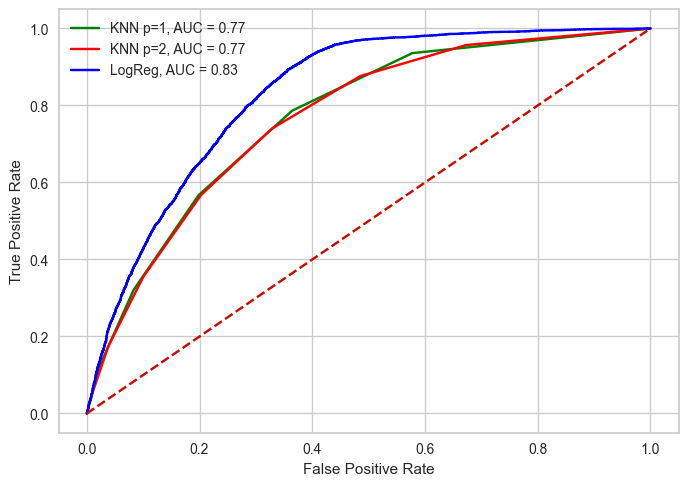

In [64]:


plt.plot(fpr1, tpr1, "green", label = 'KNN p=1, AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, "red", label = 'KNN p=2, AUC = %0.2f' % roc_auc2)
plt.plot(fpr_lg, tpr_lg, "blue",  label = 'LogReg, AUC = %0.2f' % roc_auc_lg)


plt.plot([0, 1], [0, 1],"r--")


plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.legend()
plt.show()



### According to AUC scores Logistic Regression is the best of them. Also we cannot see any overfitting according to shape of curves.


In [65]:
from tabulate import tabulate

accuracies = [["KNN p=1", acc[index1]], 
              ["KNN p=2", acc2[index2]],
              ["Logistic Regression", acs]]

head = ["Model", "Accuracy"]

print(tabulate(accuracies, headers=head, tablefmt="fancy_grid"))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ KNN p=1             │   0.717815 │
├─────────────────────┼────────────┤
│ KNN p=2             │   0.715177 │
├─────────────────────┼────────────┤
│ Logistic Regression │   0.746188 │
╘═════════════════════╧════════════╛


In [66]:
conf_df = pd.DataFrame(data=[conf_matrix_knn1.reshape(-1,), 
                            conf_matrix_knn2.reshape(-1,), 
                            conf_matrix_lg.reshape(-1,)],
                       columns=["TN", "FN", "FP", "TP"],
                       index=["KNN p=1", "KNN p=2", "Logistic Regression"])

conf_df["Accuracy"] = (conf_df["TP"] + conf_df["TN"])/len(test)
conf_df["Error Rate"] = (conf_df["FP"] + conf_df["FN"])/len(test)
conf_df["Precision"] = conf_df["TP"]/(conf_df["TP"] + conf_df["FP"])
conf_df["Recall"] =  conf_df["TP"]/(conf_df["TP"] + conf_df["FN"])

In [67]:
conf_df

TN    FN    FP    TP  Accuracy  Error Rate  Precision  \
KNN p=1              8007  1980  2406  3150  0.717815    0.282185   0.566955   
KNN p=2              7963  2024  2403  3153  0.715177    0.284823   0.567495   
Logistic Regression  7869  2118  1827  3729  0.746188    0.253812   0.671166   

                       Recall  
KNN p=1              0.614035  
KNN p=2              0.609040  
Logistic Regression  0.637763

### Logistic regression gives the worst TN result, but it gives better TP result. With that numbers, accuracy is the best with Logistic regression. Also, logistic regression gives the highest precision and recall values. As a result, we can say that logistic regression is better than kNN models.